# <span style="color:green">  GREENHOUSE GASES AND OBSERVED WARMING
This notebook serves to provide evidence that greenhouse gases are the cause of the increase in observed average global surface temperatures. This notebook was created by Grace Woolslayer. Please contact grace.woolslayer@temple.edu for any questions. 

### Before we jump in, I'm importing all the necessary packages and data needed to carry out the analysis:

In [64]:
import pandas as pd                          
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colormaps as colormap
from matplotlib.cm import get_cmap
import numpy as np

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

### Now let's import all the data:

---

### <span style="color:green"> Greenhouse gas concentration databases

In [99]:
#CO2
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/' 
CO2_MaunaLoa = pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
CO2_NOAA = pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
CO2_WDCGG = pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])

#CH4 and N2O
ds_CH4 = pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/NOAA_CH4.csv')
ds_N2O =pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/WDCGG_N2O.csv')

In [3]:
#fixing the CH4 and N20 datasets 
calendar_date_CH4=pd.to_datetime(ds_CH4[['Year', 'Month']].assign(day=1))
calendar_date_N2O=pd.to_datetime(ds_N2O[['Year', 'Month']].assign(day=1))

In [4]:
ds_CH4['Date'] = calendar_date_CH4
ds_N2O['Date'] = calendar_date_N2O

In [5]:
#renaming the variables to match the others 
NOAA_CH4=ds_CH4
WDCGG_N2O=ds_N2O

### Citations for the datasets above:
CO2 Data
- Mauna Loa: Keeling, Ralph F; Keeling, Charles D. (2017). Atmospheric Monthly In Situ CO2 Data - Mauna Loa Observatory, Hawaii (Archive 2024-01-08). In Scripps CO2 Program Data. UC San Diego Library Digital Collections. [https://doi.org/10.6075/J08W3BHW]()
- NOAA: Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 
determined from NOAA Global Monitoring Laboratory measurements. Version 2023
0[9 https://doi.org/10.15138/9N0H-ZH]
- WDCGG: [https://library.wmo.int/records/item/58743-no-18-26-october-2022]()

CH4 Data
- Lan, X., K.W. Thoning, and E.J. Dlugokencky: Trends in globally-averaged 
CH4, N2O, and SF6 determined from NOAA Global Monitoring Laboratory
measurements. Version 2023-09[, https://doi.org/10.15138/P8XG-AA]()

N2O Data
- WDCGG: [https://library.wmo.int/records/item/58743-no-18-26-october-2022]()ta
csv


### <span style="color:red"> Carbon Emission Datasets

In [8]:
fossil_fuel_emission=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/Fossil_Fuel_Emission_By_Type.csv')
fossil_fuel_emissions_by_country=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/greenhouse_gases/Nation_Fossil_Fuel_Emissions.csv')

### Citation for the datasets above:
- Global Carbon Project. (2022). Supplemental data of Global Carbon 
Budget 2022 (Version 1.0) [Data set]. Global Carbon Project [
https://doi.org/10.18160/gcp-20]()22



### <span style="color:blue"> Global Average Surface Temperature Datasets 

In [31]:
#annual global mean surface air temperature datasets
gmt_Berkeley_Earth=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_Berkeley_Earth.csv')
gmt_ERA5=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_ERA5.csv')
gmt_GISTEMP=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_GISTEMP.csv')
gmt_HadCRUT5=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_HadCRUT5.csv')
gmt_JRA=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_JRA-55.csv')
gmt_NOAAGlobalTemp=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/gmt_NOAAGlobalTemp.csv')

#annual global mean surface air temperature over land
lsat_Berkeley_Earth_Land=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/lsat_Berkeley_Earth_Land.csv')
lsat_CRUTEM5=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/lsat_CRUTEM5.csv')

#annual global mean surface temperature over the ocean (sea surface temp)
sst_ERSSTv5=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/sst_ERSSTv5.csv')
sst_HadSST3=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/sst_HadSST3.csv')
sst_HadSST4=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/temp/sst_HadSST4.csv')

### Data from above was provided by Dr. Beadling from the local drive but can be found by looking up the global mean temperature followed by the model name
All data was collected from 1850 to 2023 and is units degrees celcius 

---

# <span style="color:red">1,4,5</span> The Role of Greenhouse Gases
Why do we care so much about greenhouse gases (GHG)? Why are so many companies trying to reduce their carbon emissions? Let's explore the role that GHG plays in Earth's steady-state climate equation. Remember that the boiled-down equation is **energy in = energy out**. Incoming short-wave solar radiation enters the atmosphere and is either reflected, absorbed, or reemitted. When short-wave radiation is reflected, it stays short-wave radiation. Clouds reflect some incoming short-wave radiation as do surfaces with a high albedo. The short-wave energy that is not reflected, is absorbed and then remitted as longwave radiation back to space. Longwave radiation is not as high energy as short wave. Not all of the long-wave radiation makes it back to space. GHG absorbs most of the outgoing longwave radiation and remits it back down to Earth, insulating the atmosphere and making it habitable. Without the GHG effect, liquid water would not be able to exist because our planet would be about 59 degrees Fahrenheit cooler ([NASA](https://science.nasa.gov/climate-change/faq/what-is-the-greenhouse-effect/)). 

How are GHG able to do this? What makes them different from other gases? The atmosphere is composed of three main gasses: nitrogen (78.084%), oxygen (20.946%), and argon (0.9340%) ([NASA](https://science.nasa.gov/earth/climate-change/greenhouse-gases/the-atmosphere-getting-a-handle-on-carbon-dioxide/)). If you do the math, they make up 99.964% of the atmosphere, leaving approximately 0.04% unaccounted for. This remaining 0.04% is where the GHG concentrations reside alongside other trace gases such as helium and hydrogen. The main GHG are of course carbon dioxide (CO2), nitrous oxide (N2O), methane (CH4), and surprisingly enough water vapor. 

Even though GHG account for less than 1% of Earth's atmospheric gases, they have the power to significantly impact Earth's energy budget because of their ability to absorb and remit radiation. They can do this because of their molecular chemistry. CO2, CH4, N2O, and water vapor have molecular structures that allow them to vibrate and interact with infrared waves (aka longwave radiation) ([Fecht](https://news.climate.columbia.edu/2021/02/25/carbon-dioxide-cause-global-warming/#:~:text=But%20greenhouse%20gases%20like%20CO2,of%20wavelengths%20%E2%80%94%20including%20infrared%20waves.)). Molecules that are triatomic are able to do this but a molecule like O2 cannot since it does not have a bent structure. 

GHG have different warming potentials. Emission concentrations are typically measured in carbon dioxide equivalents (CO2-eq) which is a widely used metric that standardizes the impact of various GHGs in terms of their warming potential. One metric ton of CO2 multiplied by the GHG warming potential factor will give you the carbon dioxide equivalent concentration([Matthews, J.B.R., et al](https://doi.org/10.1017/9781009157940.008)). Methane has a warming potential of 27-35 and nitrous oxide has a warming potential of 273 over a 100-year timescale ([EPA](https://www.epa.gov/ghgemissions/understanding-global-warming-potentials)). 

We do not consider water to contribute to the experienced warming as much as CH4 or CO2 because it has a residence time in the magnitude of days. CO2, CH4. and N2O reside in the atmosphere much longer than water, making them much more impactful. CO2 has a residence time of **5-200 years**, CH4 has a residence time of about **12 years**, and N2O has a residence time of **114 years** ([IPCC](https://archive.ipcc.ch/ipccreports/tar/wg1/016.htm)).

The main source of anthropogenic CO2 is burning fossil fuels. Increases in gross domestic product (GDP) and population growth continue to be the main driver of CO2 emissions throughout the decades ([Dhakal, S., et al](https://www.cambridge.org/core/books/climate-change-2022-mitigation-of-climate-change/emissions-trends-and-drivers/82CFC42906149CC0F91311E9903F9FB8)). Enteric fermentation is the main culprit of anthropogenic CH4 ([Moraes, L.E.,et al](https://doi.org/10.1111/gcb.12471)). CH4 is one of the byproducts of cows' digestion process. Increased industrialization of the meat and dairy industry has increased the number of cows which leads to more enteric fermentation happening every year ([Moraes, L.E.,et al](https://doi.org/10.1111/gcb.12471)).  N2O is also a byproduct of enteric fermentation. Other sources include land use change and wastewater treatment ([EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases#:~:text=Nitrous%20oxide%20(N2O,as%20during%20treatment%20of%20wastewater)).

We are seeing increased surface temperatures because the energy coming in is not going out at the same rate. This is a good thing to a certain extent because as I mentioned before, the GHG effect makes our planet habitable for human life but as this energy imbalance increases, so do our surface temperatures.  

Now that you have a basic understanding of how GHG impacts the energy balance, let's prove it with some data. 

*If you learn better through auditory methods, watch this [video](https://www.youtube.com/watch?v=XFCdxppTsu0) that synthesizes these topics well.*

# Pre-industrial Concentrations
The pre-industrial period marks the time before the Industrial Revolution that started in 1850 ([Copernicus](https://climate.copernicus.eu/why-do-we-keep-talking-about-15degc-and-2degc-above-pre-industrial-era#:~:text=Then%2C%20following%20the%20methodology%20defined,period%20(1850%2D1900).)). 
Pre-industrial concentrations were approximately :
- CO2 ~280 ppm
- CH4 ~700 ppb
- N2O ~280 ppb

*ppm = parts per million
*ppb = parts per billion

In [10]:
CO2_NOAA #looking at how the data is organized 

,Date,NOAA CO2 (ppm),NOAA CO2 uncertainty
0,1979-01-01,336.56,NaN
1,1979-02-01,337.29,NaN
2,1979-03-01,337.88,NaN
3,1979-04-01,338.32,NaN
4,1979-05-01,338.26,NaN
...,...,...,...
524,2022-09-01,414.60,NaN
525,2022-10-01,416.12,NaN
526,2022-11-01,417.73,NaN
527,2022-12-01,418.77,NaN


In [11]:
CO2_NOAA.iloc[-1] #this dataset already has the average concentration per year 

Date                    2023-01-01 00:00:00
NOAA CO2 (ppm)                       419.31
NOAA CO2 uncertainty                    NaN
Name: 528, dtype: object

In [12]:
NOAA_CH4 #looking at how the data is organized 

,Year,Month,NOAA CH4 (ppb),NOAA CH4 uncertainty,Date
0,1983,7,1625.95,4.116,1983-07-01
1,1983,8,1628.06,5.272,1983-08-01
2,1983,9,1638.44,4.567,1983-09-01
3,1983,10,1644.80,3.116,1983-10-01
4,1983,11,1642.60,1.529,1983-11-01
...,...,...,...,...,...
469,2022,8,1908.78,NaN,2022-08-01
470,2022,9,1915.53,NaN,2022-09-01
471,2022,10,1920.01,NaN,2022-10-01
472,2022,11,1923.78,NaN,2022-11-01


In [13]:
#this dataset has the average values per month but we need the full year so I'm isolating the months in 2022, the most recent year
full_year_CH4=NOAA_CH4.loc[462:473,['NOAA CH4 (ppb)','Date']]
full_year_CH4 

,NOAA CH4 (ppb),Date
462,1907.47,2022-01-01
463,1907.76,2022-02-01
464,1909.03,2022-03-01
465,1909.41,2022-04-01
466,1907.75,2022-05-01
467,1905.28,2022-06-01
468,1904.47,2022-07-01
469,1908.78,2022-08-01
470,1915.53,2022-09-01
471,1920.01,2022-10-01


In [100]:
#computing the average (units ppb)
CH4_recent_annual_average=full_year_CH4['NOAA CH4 (ppb)'].mean()
CH4_recent_annual_average

1912.0216666666665

In [15]:
#this dataset is organized the same way as the CH4 one so we need to isolate the months in 2021, the most recent year
WDCGG_N2O

,Year,Month,WDCGG N2O (ppb),WDCGG N2O uncertainty,Date
0,1984,1,303.8,NaN,1984-01-01
1,1984,2,303.8,NaN,1984-02-01
2,1984,3,303.7,NaN,1984-03-01
3,1984,4,303.7,NaN,1984-04-01
4,1984,5,303.7,NaN,1984-05-01
...,...,...,...,...,...
451,2021,8,334.5,NaN,2021-08-01
452,2021,9,334.7,NaN,2021-09-01
453,2021,10,334.9,NaN,2021-10-01
454,2021,11,335.1,NaN,2021-11-01


In [101]:
#slicing the most recent year from this dataset
full_year_N2O=WDCGG_N2O.loc[444:455,['WDCGG N2O (ppb)','Date']]
full_year_N2O

,WDCGG N2O (ppb),Date
444,334.1,2021-01-01
445,334.2,2021-02-01
446,334.2,2021-03-01
447,334.2,2021-04-01
448,334.2,2021-05-01
449,334.3,2021-06-01
450,334.4,2021-07-01
451,334.5,2021-08-01
452,334.7,2021-09-01
453,334.9,2021-10-01


In [17]:
#computing the average (units ppb)
N2O_recent_annual_average=full_year_N2O['WDCGG N2O (ppb)'].mean()
N2O_recent_annual_average

334.5083333333333

# <span style="color:red">2.</span> Concentrations of GHG then and now
||CO2|CH4|N2O|
|---|---|---|---|
|pre-industrial concentration|~280 ppm|~700 ppb|~280 ppb
|recent concentrations|~419 ppm|~1912 ppb|~335 ppb


In [18]:
#calculating percent change
CO2_percent_change=((419-280)/280)*100
CH4_percent_change=((1912-700)/700)*100
N2O_percent_change=((335-280)/280)*100

CO2_percent_change,CH4_percent_change,N2O_percent_change

(49.642857142857146, 173.14285714285717, 19.642857142857142)

# <span style="color:red">3.</span>
Above is a side-by-side comparison of the GHG concentrations before the Industrial Revolution and after. There was about a **50% increase in CO2,  173% in CH4, and 20% in N2O** since 1850. Methane has increased the most relative to its pre=inustrial concentration. 

![](https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2024-04/ClimateDashboard-atmospheric-carbon-dioxide-image-paleo-20240405-1400px.png?itok=-g_Qgndc)

# <span style="color:red">6.</span>
The image above depicts CO2 fluctuations from 800,000 years ago. Average fluctuations ranged from 180ppm - 280ppm and never exceeded 300ppm. These oscillations are due to glacial and interglacial time periods. We have data on past CO2 concentrations thanks to bubbles trapped in ice cores ([NOAA](https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)).

# <span style="color:red">7.</span> 
*I explained the main contributors to the long-term trends of CO2 and N2O in my section explaining GHG

# Visualizing the Observed Changes of CO<sub>2 </sub>, CH<sub>4 </sub>, and N<sub>2</sub>O

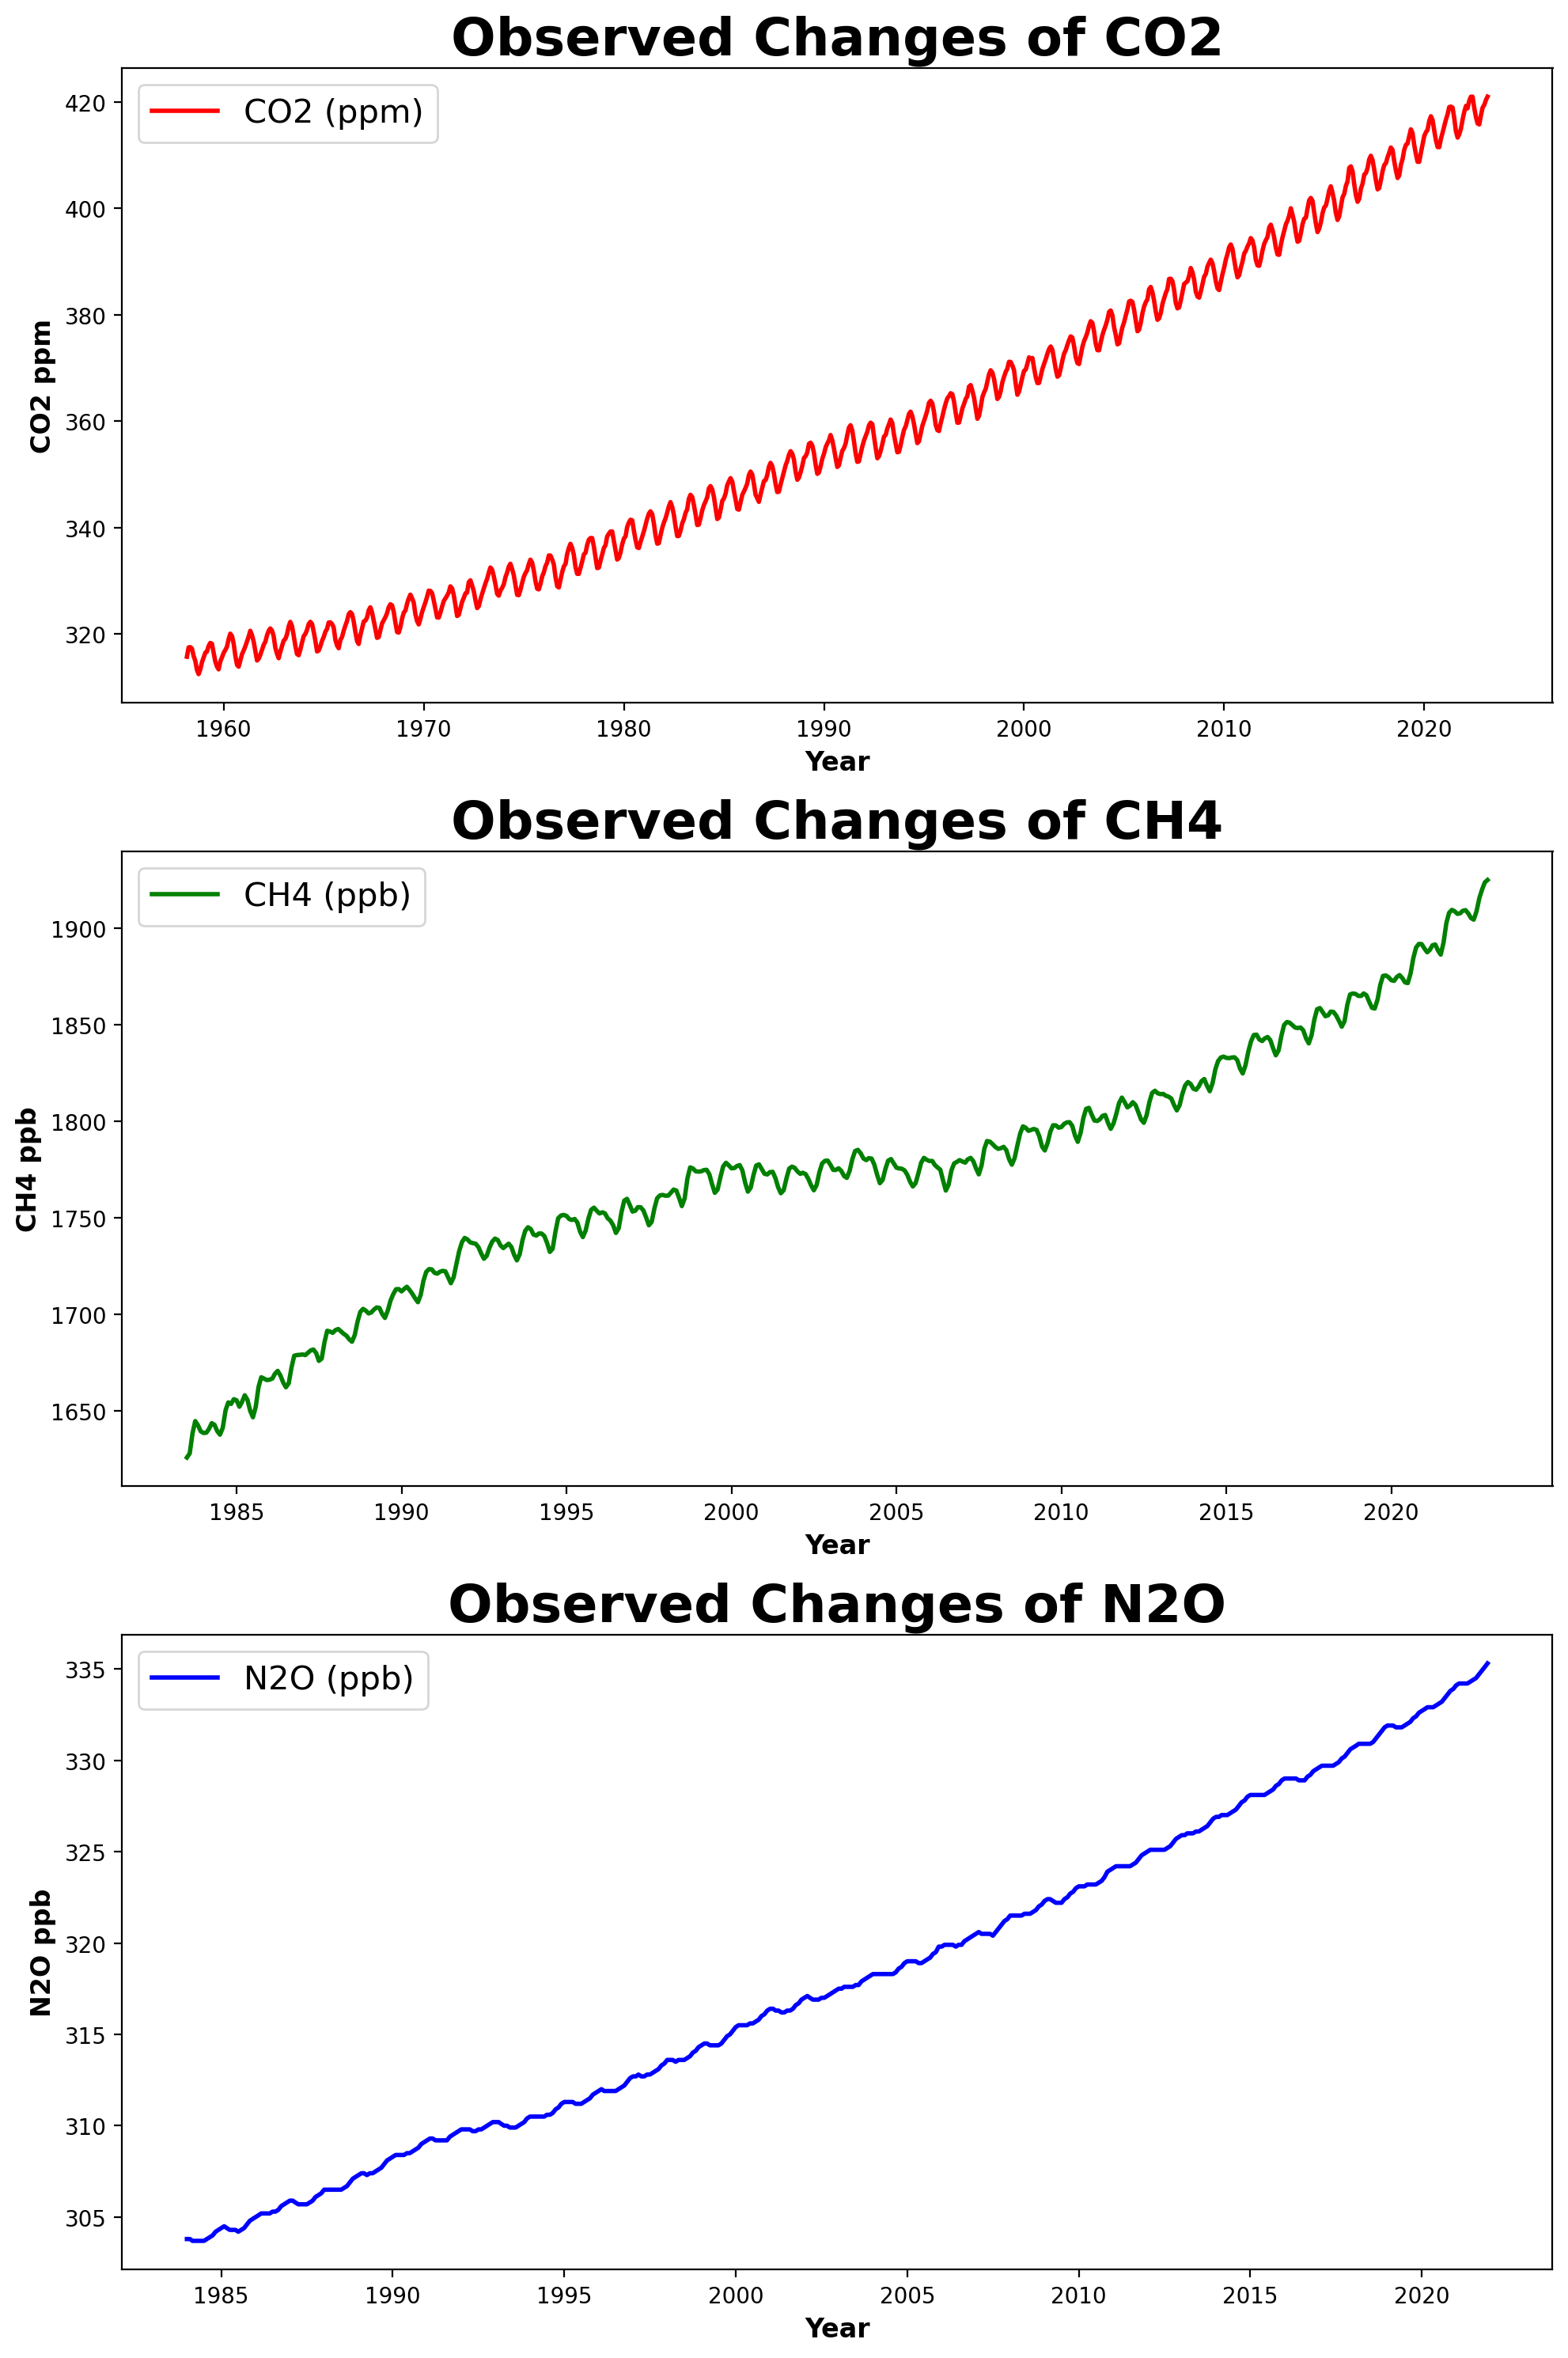

In [104]:
#creating a plot to visualize the changes of GHG during the period of observation
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

#CO2 from Mauna Loa
ax1.plot(CO2_MaunaLoa['Date'], CO2_MaunaLoa['Mauna Loa CO2 (ppm)'], linewidth=2,label='CO2 (ppm)', color='red')
ax1.set_title('Observed Changes of CO2', fontsize=24, fontweight='bold')
ax1.set_ylabel('CO2 ppm', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.legend(fontsize=15)

#CH4 from NOAA
ax2.plot(NOAA_CH4['Date'], NOAA_CH4['NOAA CH4 (ppb)'], linewidth=2,label='CH4 (ppb)', color='green')
ax2.set_title('Observed Changes of CH4', fontsize=24, fontweight='bold')
ax2.set_ylabel('CH4 ppb', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12  , fontweight='bold')
ax2.legend(fontsize=15)

#N2O from WDCGG
ax3.plot(WDCGG_N2O['Date'], WDCGG_N2O['WDCGG N2O (ppb)'], linewidth=2,label='N2O (ppb)', color='blue')
ax3.set_title('Observed Changes of N2O', fontsize=24, fontweight='bold')
ax3.set_ylabel('N2O ppb', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.legend(fontsize=15)

plt.tight_layout()

**Figure 1.** Time series of observed changes in carbon dioxide, methane, and nitrous oxide from the early 1980s to the beginning of 2020s from data collected from Mauna Loa, NOAA, and WDCGG.

All three GHGs see staggering long-term concentration increases. CO2 shows the most uniform variations, while CH4 concentrations seem to experience a unique pattern. There is a steeper increase in the 1980s but starts to level out around the 2000s but starts to steadily increase again around 2007 ([Wilson](https://www.nature.com/articles/s43247-023-00971-7#:~:text=Atmospheric%20methane%20(CH4)%20rose,that%20has%20increased%20over%20time.)). CH4's primary anthropogenic source is agriculture but CH4 is also released by permafrost that has been thawing due to increased surface temperatures. The release of CH4 creates a positive feedback loop in the climate system since it is caused by the warming and continues to amplify the warming. Tropical wetlands are another natural contributor to the observed changes through anaerobic microbes that reside there. These microbes exhale CH4 when thawed out and exposed to the surface. Understanding the variations of CH4 still puzzles scientists but NOAA has been working to hypothesize a reason for the abnormal long-term trend. Declines in the 2000's have been thought to be a cause of more control during drilling operations ([Lindsey, Scott](https://www.climate.gov/news-features/understanding-climate/after-2000-era-plateau-global-methane-levels-hitting-new-highs)). N2O concentrations on the other hand see less short-term variation. 

# <span style="color:red">8.</span> Interannual CO<sub>2 </sub> Variation
Let's take a closer look at CO2 variability on an annual time scale

In [20]:
#isolated one year of CO2 data from WDCGG and chose the year 2002 because that was the year I was born so why not
one_year_CO2=CO2_WDCGG.loc[216:227,['WDCGG CO2 (ppm)','Date']]
one_year_CO2

,WDCGG CO2 (ppm),Date
216,373.58,2002-01-01
217,373.98,2002-02-01
218,374.17,2002-03-01
219,374.30,2002-04-01
220,373.91,2002-05-01
221,372.75,2002-06-01
222,371.26,2002-07-01
223,370.43,2002-08-01
224,370.91,2002-09-01
225,372.62,2002-10-01


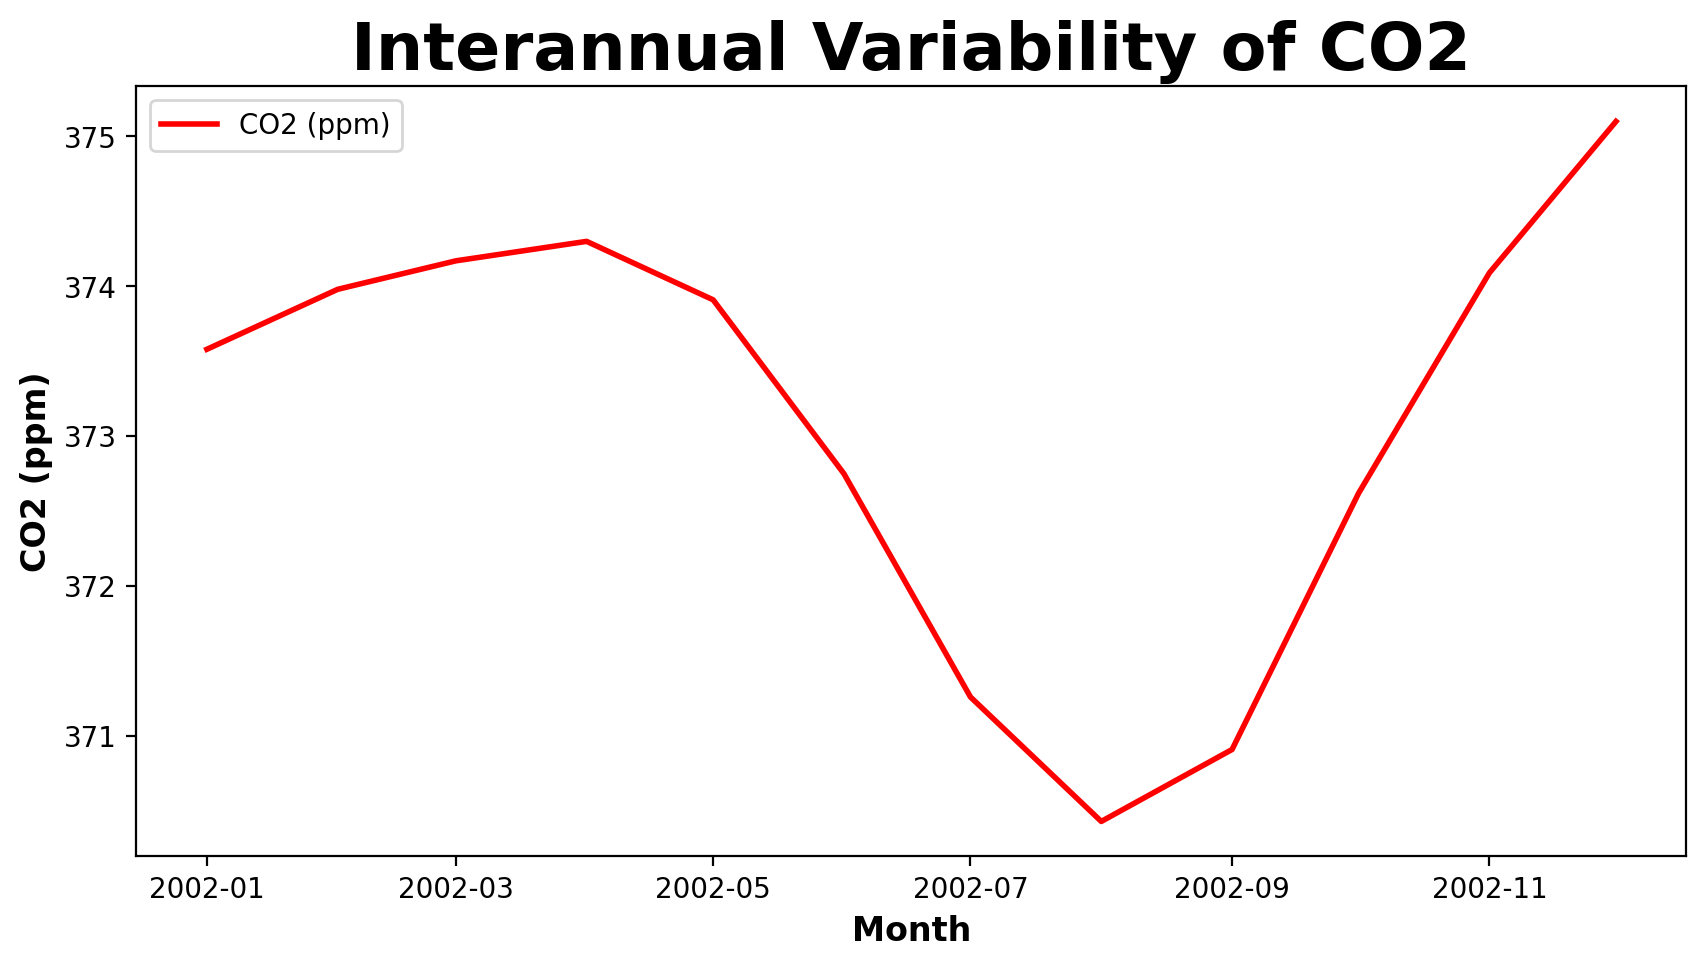

In [21]:
#creating a plot to visualize the short-term variation of CO2
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(one_year_CO2['Date'],
         one_year_CO2['WDCGG CO2 (ppm)'],
         linewidth=2,label='CO2 (ppm)',
         color='red')

#customizing my chart
ax.set_title('Interannual Variability of CO2',
             fontsize=24, fontweight='bold')
ax.set_ylabel('CO2 (ppm)',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Month',
             fontsize=12, fontweight='bold')
plt.legend()

**Figure 2.** Interannual variability of carbon dioxide measured in ppm for the year 2002 from the WDCGG dataset. 

CO2 goes through natural cycles of variations which are mainly driven by vegetation. Summer is peak vegetation growth time which explains why we see a dip in CO2 levels amid August ([Lindsey](https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide#:~:text=The%20seasonal%20cycle%20of%20highs,is%20driven%20by%20human%20activities.)). Going back to basic biology, we know that plants use CO2 during photosynthesis. Increased growth rates mean increased CO2 consumption. During the winter, organic material decays which is why we see an increase during the colder months at the beginning and end of the year ([Lindsey](https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide#:~:text=The%20seasonal%20cycle%20of%20highs,is%20driven%20by%20human%20activities.)). 

# <span style="color:red">9.</span> Top GHG Emmiters
The top ten GHG Emitters are
- China
- United States
- India
- EU (made of 27 countries)
- Russia
- Japan
- Brazil
- Indonesia
- Iran
- Canada

The top three sources of GHG in the United States are electricity/heat, transportation, and buildings. 

*Information from [World Resources Institue](https://www.wri.org/insights/interactive-chart-shows-changes-worlds-top-10-emitters)*

# <span style="color:red">10.</span>  Visualizing the Top 10 Countries GHG

In [22]:
fossil_fuel_emissions_by_country

,Year,AFGHANISTAN,ALBANIA,ALGERIA,ANDORRA,ANGOLA,ANGUILLA,ANTIGUA & BARBUDA,ARGENTINA,ARMENIA,...,EU27,Africa,Asia,Central America,Europe,Middle East,North America,Oceania,South America,World
0,1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,14.79,0.00,0.00,0.00,48.32,0.00,5.42,0.00,0.00,53.74
1,1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,15.64,0.00,0.00,0.00,47.52,0.00,6.74,0.00,0.00,54.26
2,1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,17.55,0.00,0.00,0.00,49.31,0.00,7.34,0.00,0.00,56.65
3,1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,19.43,0.00,0.00,0.00,51.02,0.00,8.26,0.00,0.00,59.28
4,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,22.47,0.00,0.00,0.00,60.55,0.00,9.08,0.00,0.00,69.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2017,2.69,1.52,45.42,0.13,6.63,0.04,0.13,51.01,1.51,...,852.41,376.50,4695.64,48.32,1536.74,720.88,1705.44,125.30,307.07,9851.73
168,2018,2.95,1.36,47.46,0.14,6.22,0.04,0.14,49.29,1.59,...,832.20,372.93,4863.32,48.49,1529.43,716.72,1756.80,125.86,290.56,10050.90
169,2019,3.02,1.35,48.99,0.13,5.95,0.04,0.14,48.72,1.72,...,793.24,400.51,4987.79,50.27,1481.07,717.01,1723.98,126.22,292.90,10120.79
170,2020,3.19,1.29,47.08,0.12,5.53,0.04,0.12,46.20,1.76,...,715.56,378.24,4932.42,44.44,1367.62,716.62,1540.07,121.14,267.79,9624.48


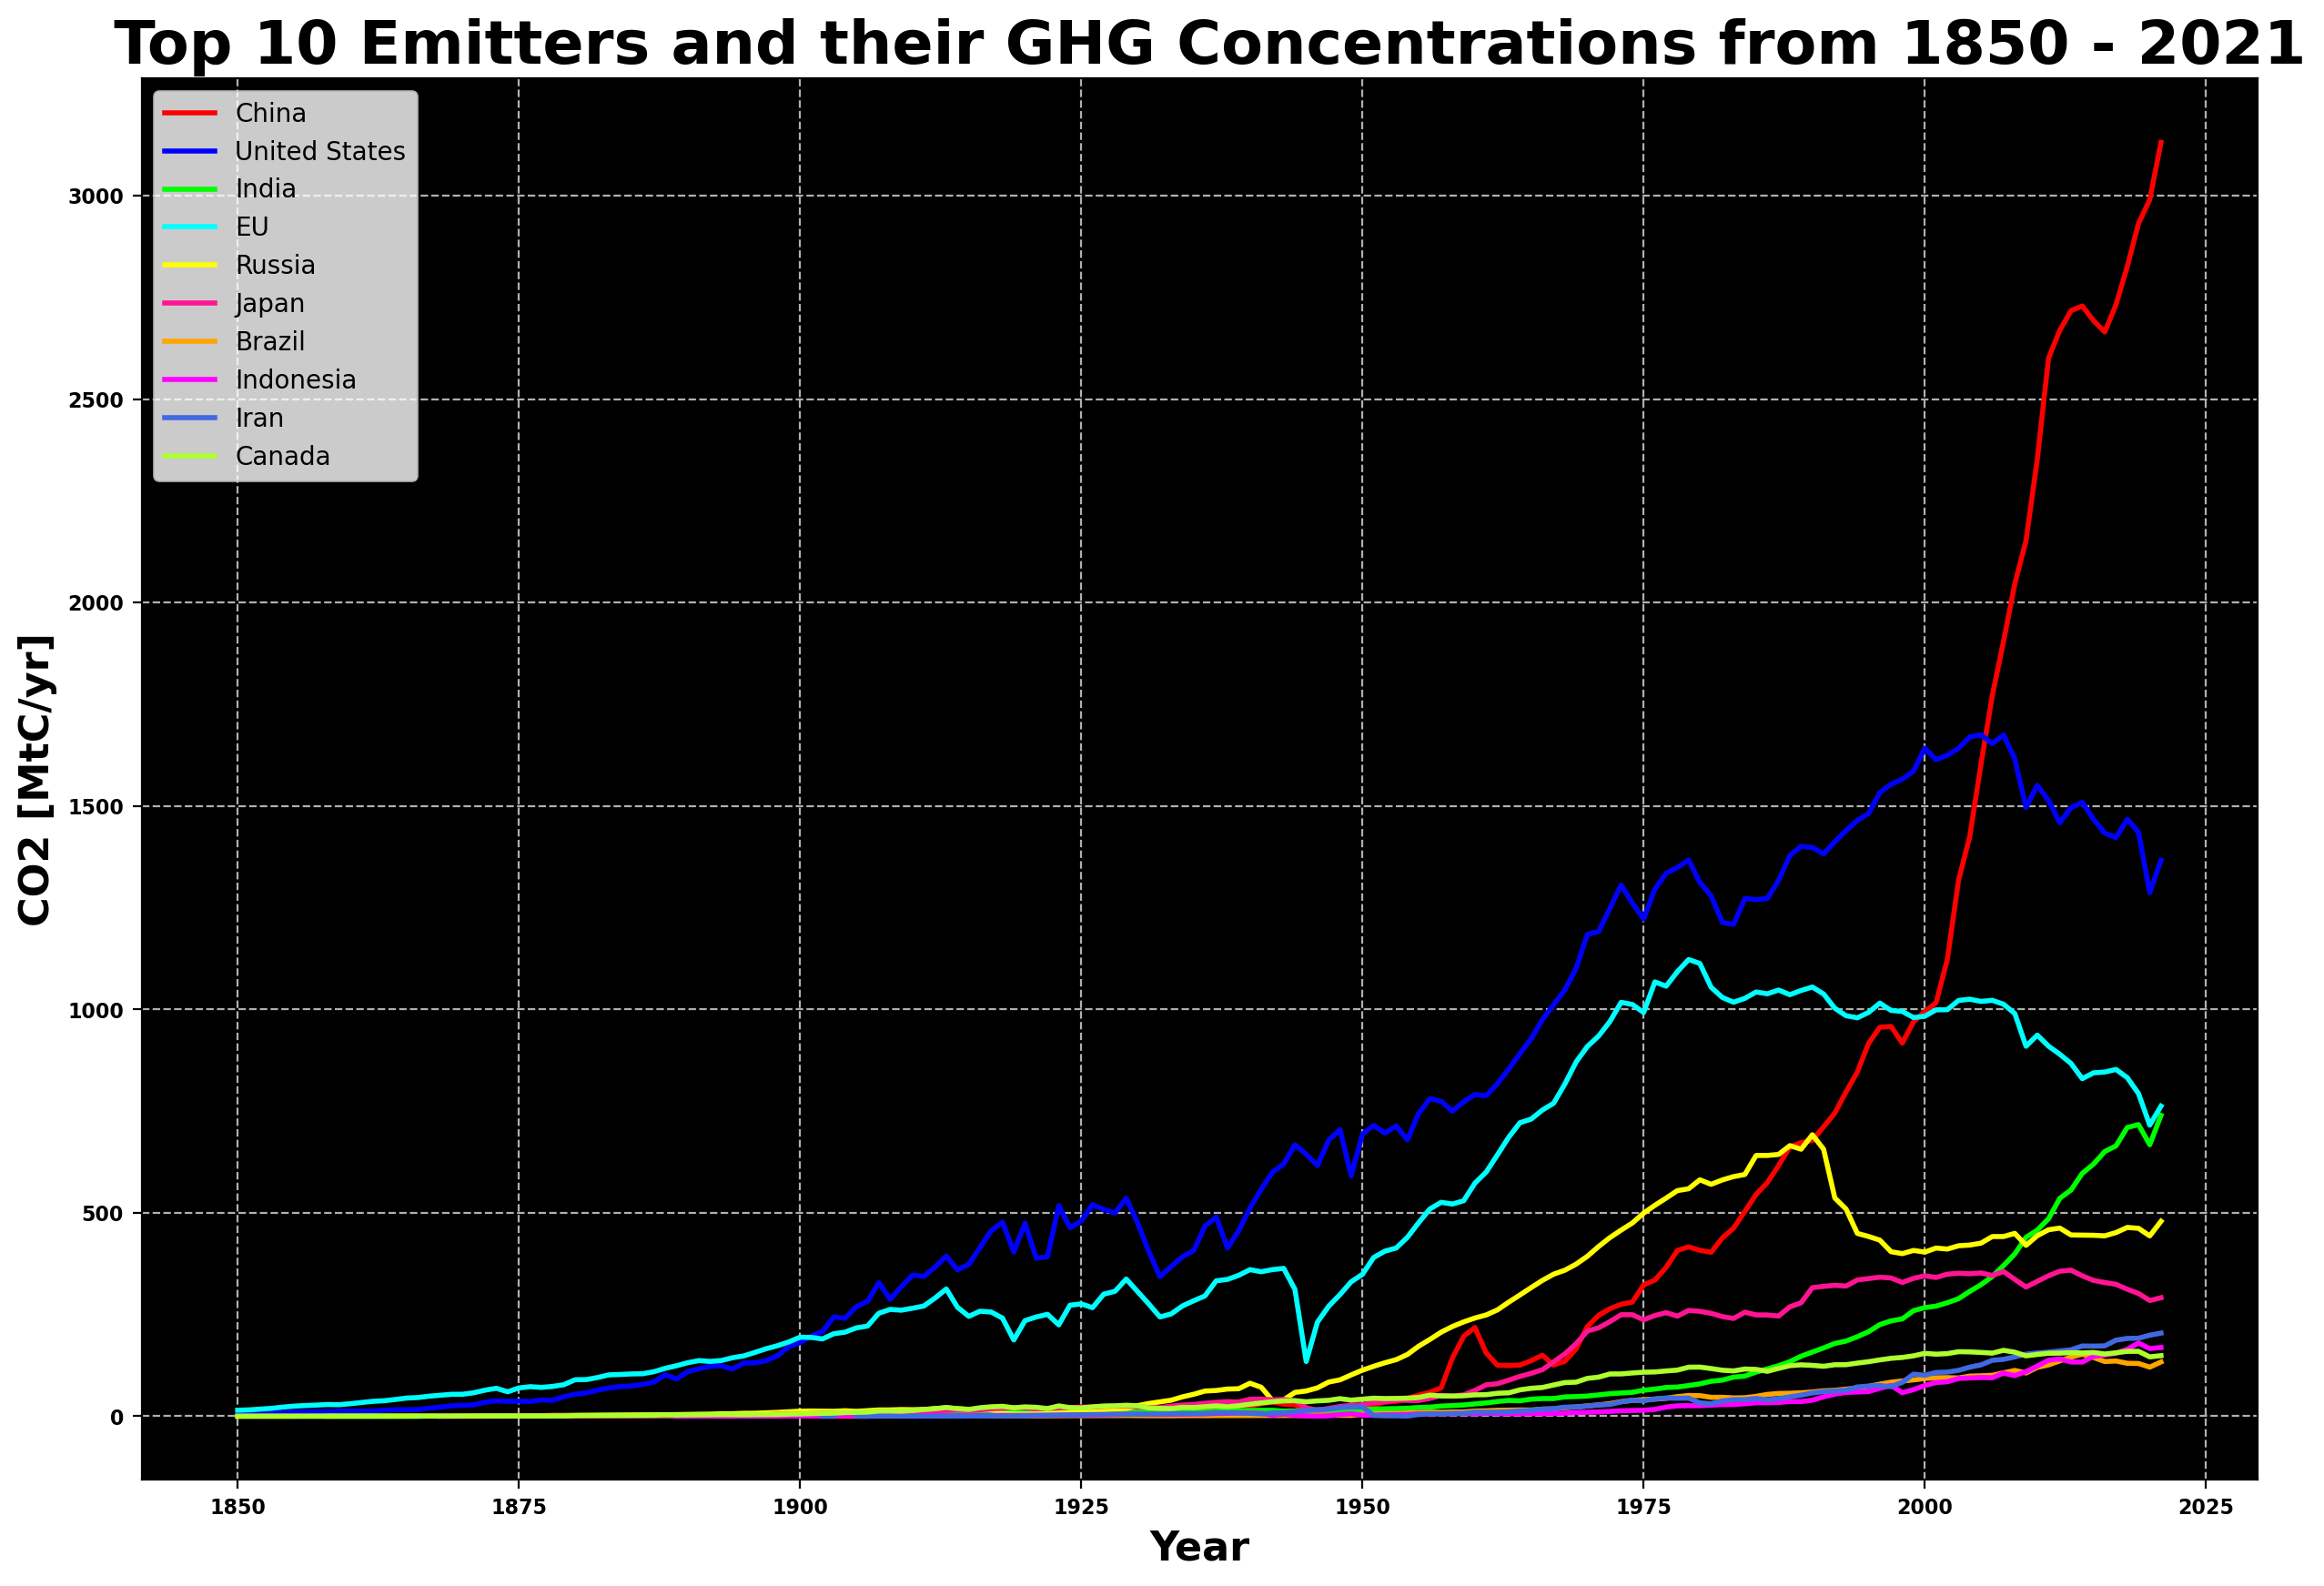

In [23]:
#creating a plot to Visualize the Top 10 Countries GHG from 1850 - 2021
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['CHINA (MAINLAND)'],
         linewidth=2,label='China',
         color='red')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['UNITED STATES OF AMERICA'],
         linewidth=2,label='United States',
         color='blue')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['INDIA'],
         linewidth=2,label='India',
         color='lime')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['EU27'],
         linewidth=2,label='EU',
         color='aqua')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['RUSSIAN FEDERATION'],
         linewidth=2,label='Russia',
         color='yellow')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['JAPAN'],
         linewidth=2,label='Japan',
         color='deeppink')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['BRAZIL'],
         linewidth=2,label='Brazil',
         color='orange')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['INDONESIA'],
         linewidth=2,label='Indonesia',
         color='magenta')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['ISLAMIC REPUBLIC OF IRAN'],
         linewidth=2,label='Iran',
         color='royalblue')

ax.plot(fossil_fuel_emissions_by_country['Year'],
         fossil_fuel_emissions_by_country['CANADA'],
         linewidth=2,label='Canada',
         color='greenyellow')






## Set properties of title, ylabels and xlabels
ax.set_title(' Top 10 Emitters and their GHG Concentrations from 1850 - 2021',
             fontsize=24, fontweight='bold')
ax.set_ylabel('CO2 [MtC/yr]',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=16, fontweight='bold')

plt.legend() 
plt.grid(linestyle='--') ## Add dashed grid lines

### adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")

ax.set_facecolor("k")

**Figure 3.** Concentrations of GHG emissions collected from the Global Carbon Project that shows the top 10 emitters from 1850 - 2021 measured in megatons of carbon per year. 

# <span style="color:red">11.</span> 

In [24]:
year_2021_china=fossil_fuel_emissions_by_country.loc[171,'CHINA (MAINLAND)']
year_2021_usa=fossil_fuel_emissions_by_country.loc[171,'UNITED STATES OF AMERICA']
year_2021_india=fossil_fuel_emissions_by_country.loc[171,'INDIA']
year_2021_eu=fossil_fuel_emissions_by_country.loc[171,'EU27']
year_2021_russia=fossil_fuel_emissions_by_country.loc[171,'RUSSIAN FEDERATION']
year_2021_japan=fossil_fuel_emissions_by_country.loc[171,'JAPAN']
year_2021_brazil=fossil_fuel_emissions_by_country.loc[171,'BRAZIL']
year_2021_indonesia=fossil_fuel_emissions_by_country.loc[171,'INDONESIA']
year_2021_iran=fossil_fuel_emissions_by_country.loc[171,'ISLAMIC REPUBLIC OF IRAN']
year_2021_canada=fossil_fuel_emissions_by_country.loc[171,'CANADA']

emissions_from_2021=year_2021_china,year_2021_usa,year_2021_india,year_2021_eu,year_2021_russia,year_2021_japan,year_2021_brazil,year_2021_indonesia,year_2021_iran,year_2021_canada
emissions_from_2021

(3131.11,
 1366.63,
 739.54,
 762.29,
 479.13,
 291.32,
 133.43,
 169.02,
 204.39,
 148.92)

negative anaomalies subtract the year from the baseline

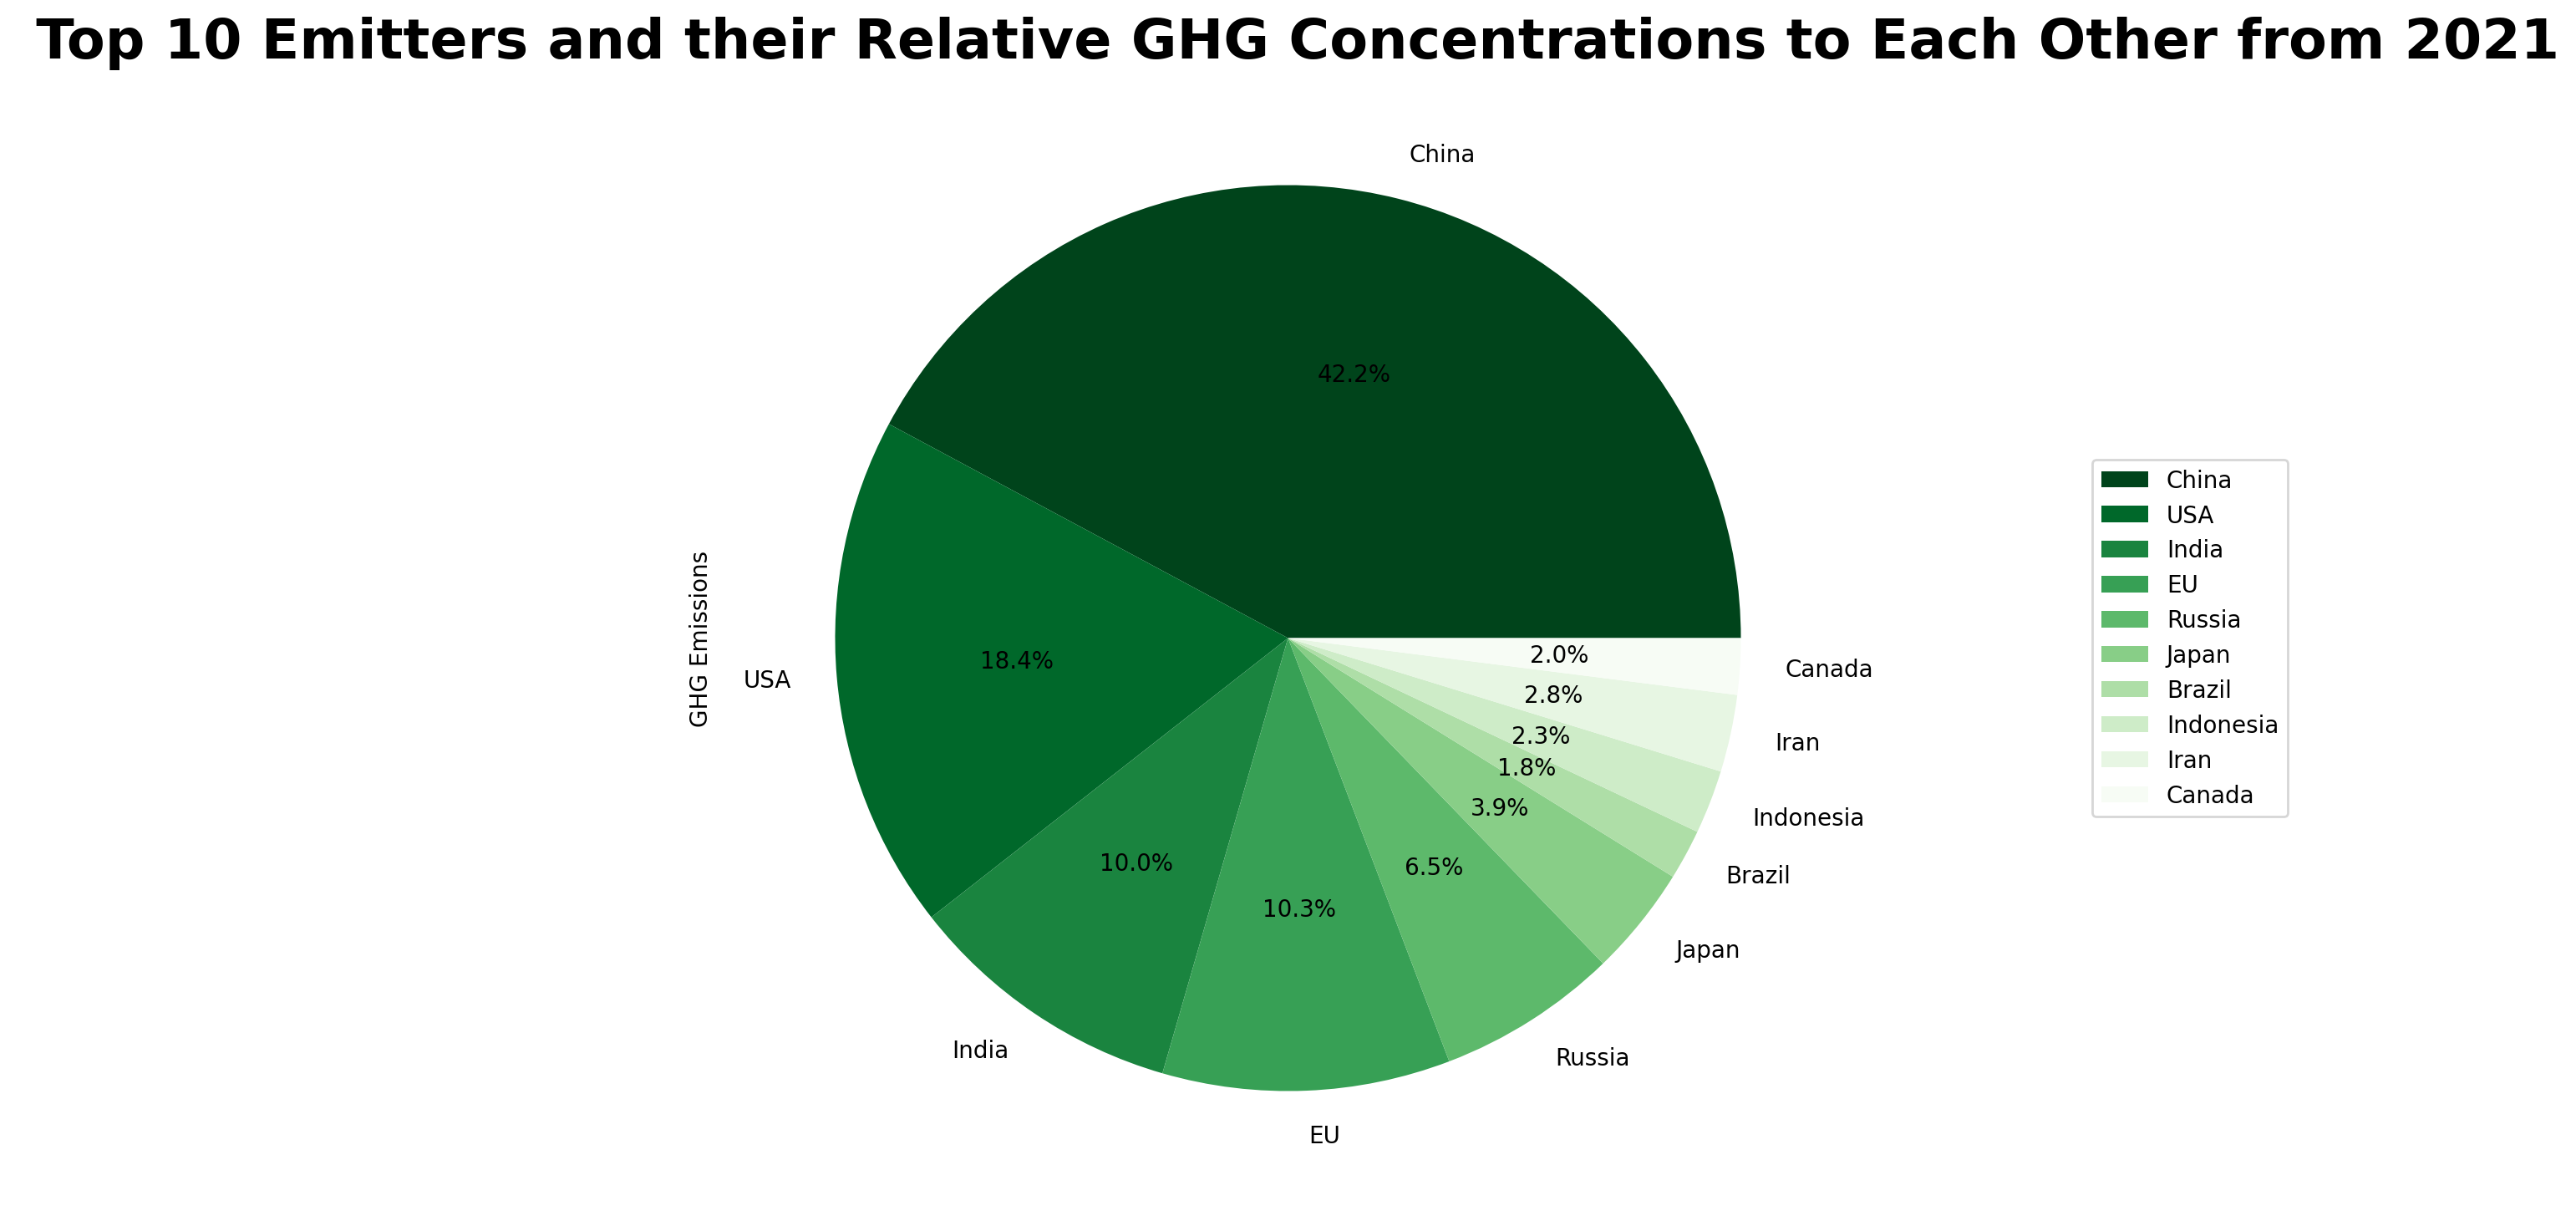

In [108]:
#making a pie chart to visualize the top emitters emissions relative to each other
df=pd.DataFrame({'GHG Emissions': [3131.11,
 1366.63,
 739.54,
 762.29,
 479.13,
 291.32,
 133.43,
 169.02,
 204.39,
 148.92]}, index=['China', 'USA', 'India', 'EU', 'Russia', 'Japan', 'Brazil', 'Indonesia', 'Iran', 'Canada'])
plot=df.plot.pie(y='GHG Emissions', labeldistance=1.1,figsize=(10, 10),autopct='%1.1f%%',cmap='Greens_r')
#autopct calculates the percents to 1 decimal place

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.title(' Top 10 Emitters and their Relative GHG Concentrations to Each Other from 2021',
             fontsize=24, fontweight='bold')

plt.tight_layout()

**Figure 4.** 2021 GHG emissions from the top emitters relative to each other by percent. Data collected from the Global Carbon Project.

# <span style="color:red">12.</span> Comparing Visualizations
The time series allows an individual to gain a deeper understanding of how GHG emissions have increased over the decades. However, it can be a bit overwhelming and harder to distinguish between the lines when some of them are overlapping. The pie chart doesn't provide a temporal relationship but gives insight into how much GHG are being emitted by each country relative to each other in one year. 

# <span style="color:red">13.</span> Annual Carbon Emission by Emission Type
Let's look at which type of carbon emission has had the most impact since 1850.

In [26]:
fossil_fuel_emission

,Year,fossil.emissions.excluding.carbonation (MtC/yr),Coal (MtC/yr),Oil (MtC/yr),Gas (MtC/yr),Cement.emission (MtC/yr),Flaring (MtC/yr),Other (MtC/yr),Per.Capita (MtC/yr)
0,1850,53.74,53.74,0.00,0.00,0.00,0.00,0.00,0.04
1,1851,54.26,54.26,0.00,0.00,0.00,0.00,0.00,0.04
2,1852,56.65,56.65,0.00,0.00,0.00,0.00,0.00,0.04
3,1853,59.28,59.28,0.00,0.00,0.00,0.00,0.00,0.05
4,1854,69.63,69.63,0.00,0.00,0.00,0.00,0.00,0.05
...,...,...,...,...,...,...,...,...,...
167,2017,9851.73,3959.33,3341.33,1950.03,411.55,106.98,82.50,1.30
168,2018,10050.90,4024.79,3347.71,2055.09,428.28,112.48,82.55,1.31
169,2019,10120.79,4019.10,3369.45,2087.21,441.46,119.88,83.69,1.30
170,2020,9624.48,3868.60,3054.53,2062.31,446.93,111.24,80.87,1.23


### <span style="color:red">*Flaring is a common practice in the oil and coal industry where "field operators opt to burn the "associated" gas that accompanies oil production, or simply release it to the atmosphere, rather than to build the equipment and pipelines to capture it" ([IEA](https://www.iea.org/energy-system/fossil-fuels/gas-flaring)).

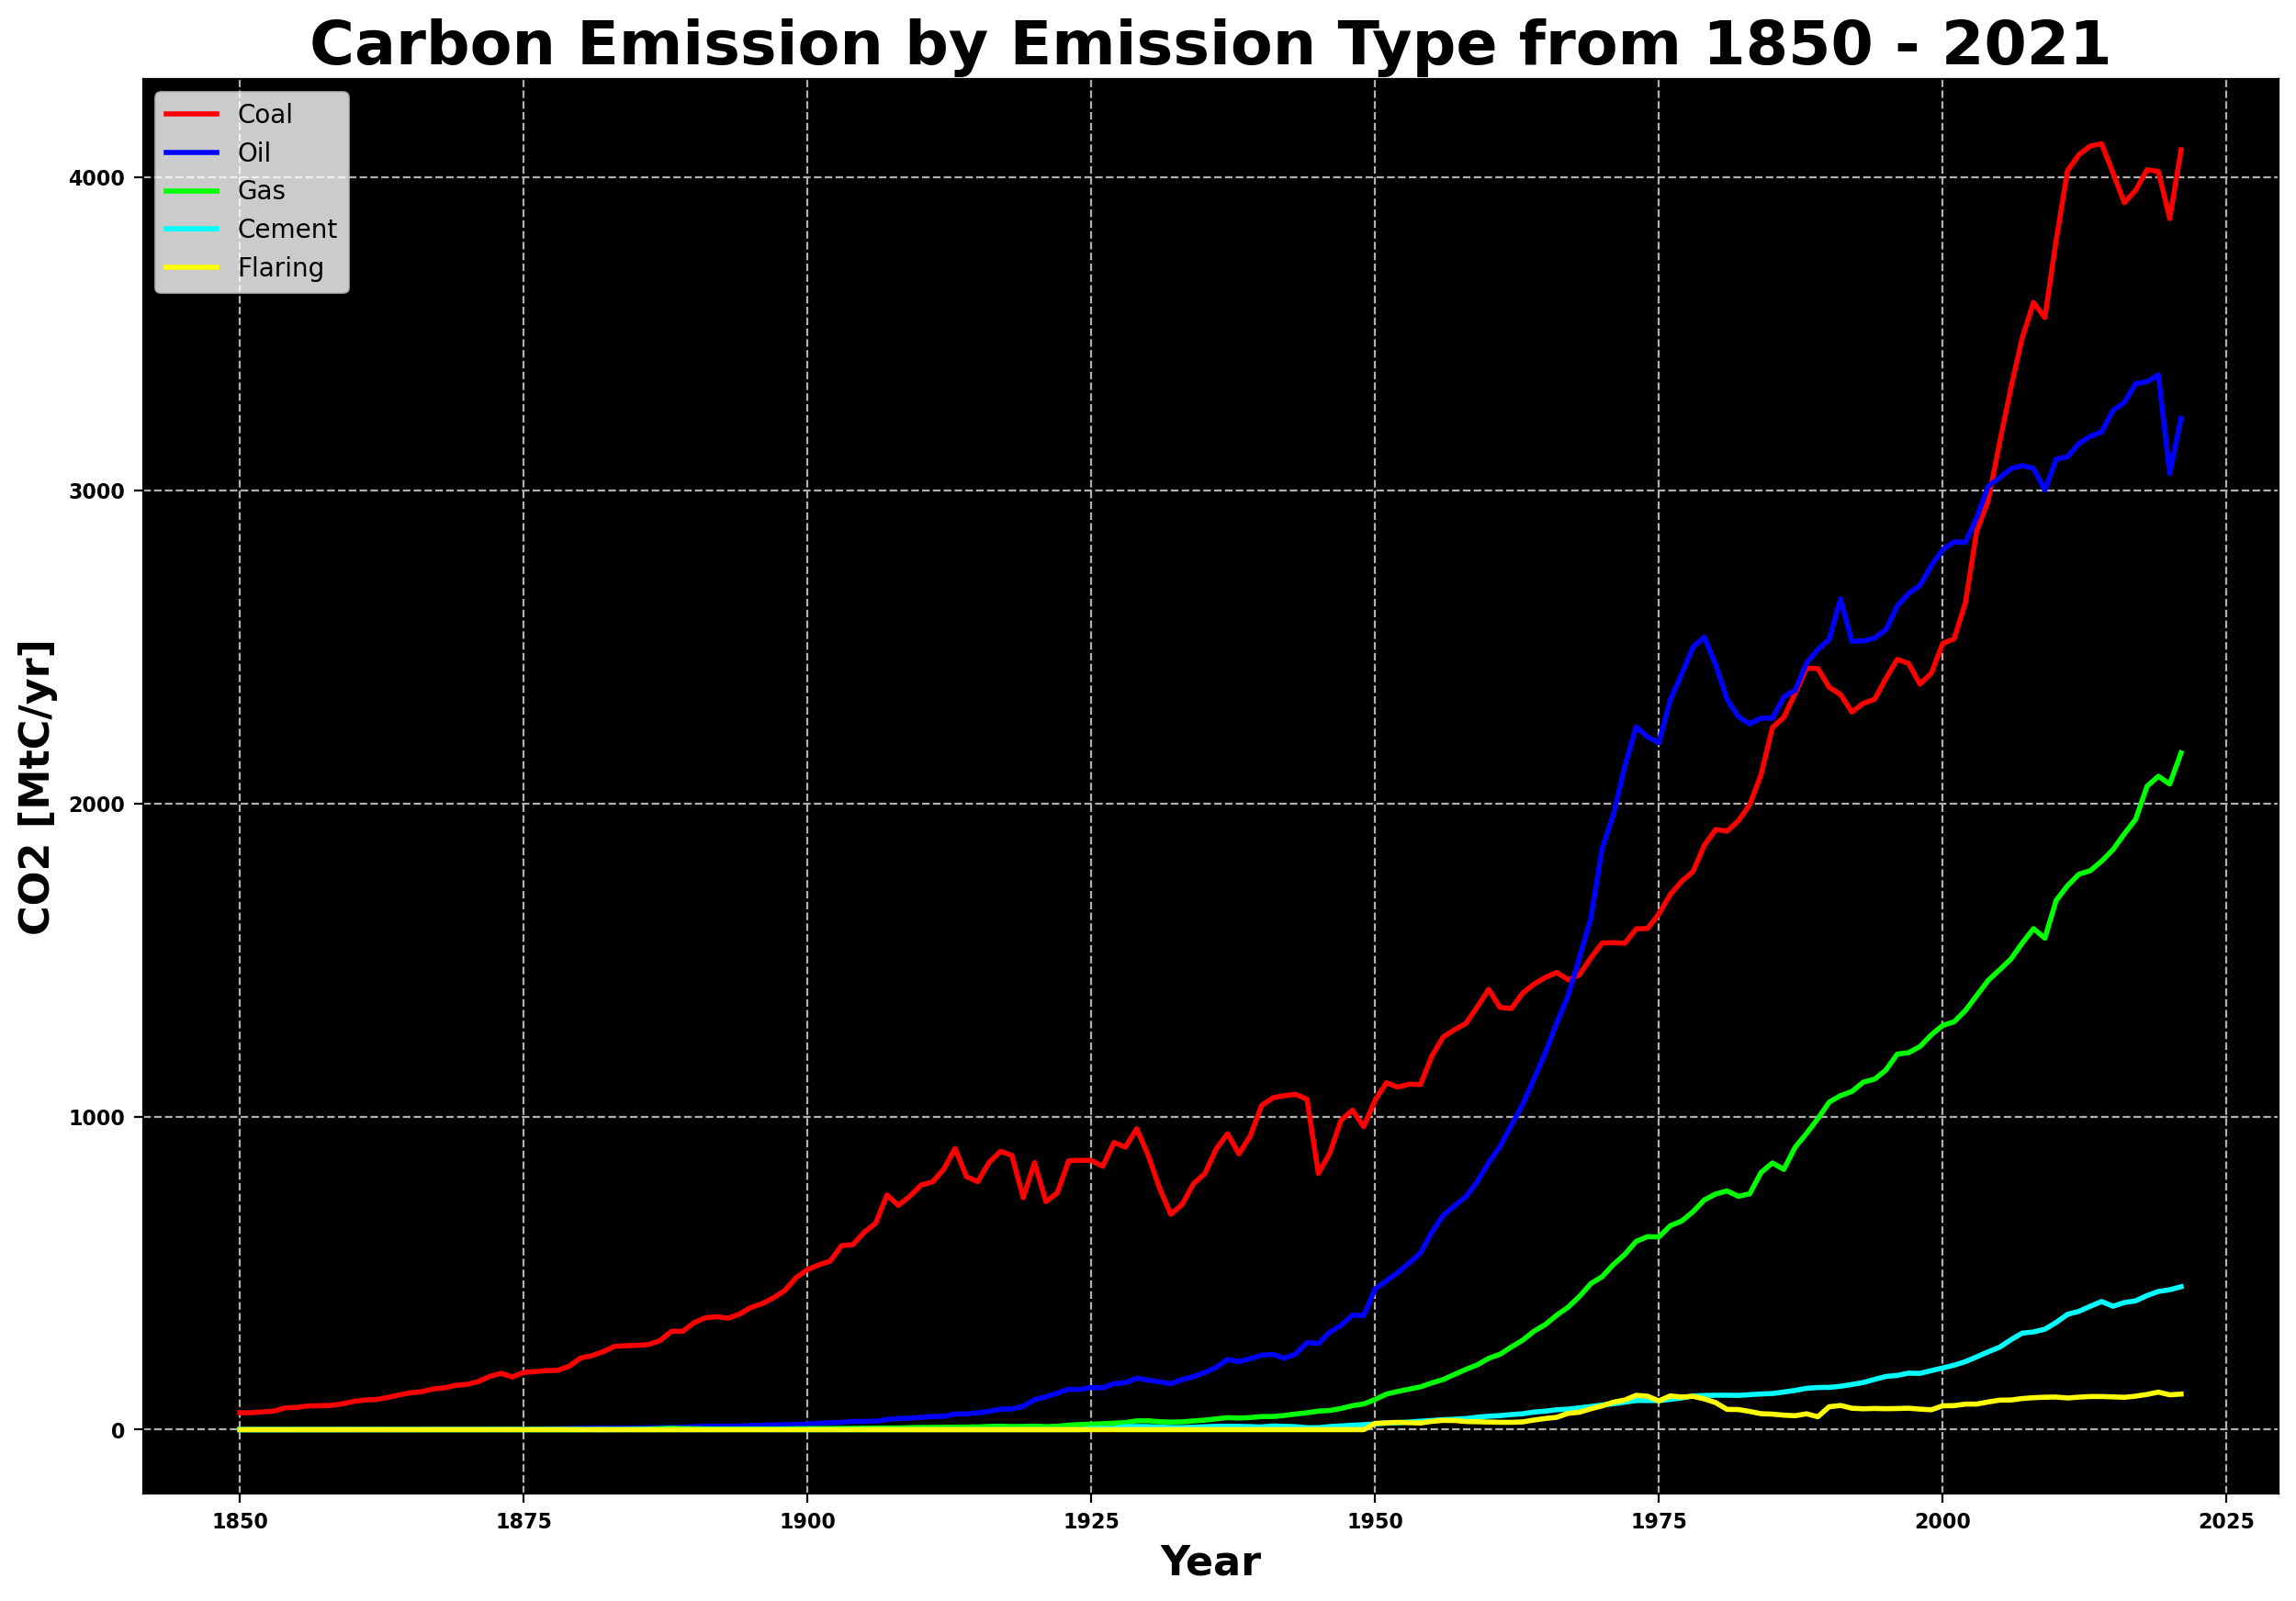

In [37]:
#creating a plot to Visualize the carbon emissions by type
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(fossil_fuel_emission['Year'],
         fossil_fuel_emission['Coal (MtC/yr)'],
         linewidth=2,label='Coal',
         color='red')

ax.plot(fossil_fuel_emission['Year'],
         fossil_fuel_emission['Oil (MtC/yr)'],
         linewidth=2,label='Oil',
         color='blue')

ax.plot(fossil_fuel_emission['Year'],
         fossil_fuel_emission['Gas (MtC/yr)'],
         linewidth=2,label='Gas',
         color='lime')

ax.plot(fossil_fuel_emission['Year'],
         fossil_fuel_emission['Cement.emission (MtC/yr)'],
         linewidth=2,label='Cement',
         color='aqua')

ax.plot(fossil_fuel_emission['Year'],
         fossil_fuel_emission['Flaring (MtC/yr)'],
         linewidth=2,label='Flaring',
         color='yellow')


## Set properties of title, ylabels and xlabels
ax.set_title('Carbon Emission by Emission Type from 1850 - 2021',
             fontsize=24, fontweight='bold')
ax.set_ylabel('CO2 [MtC/yr]',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=16, fontweight='bold')

plt.legend() 
plt.grid(linestyle='--') ## Add dashed grid lines

### adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")

ax.set_facecolor("k")

**Figure 4.** Carbon emissions based on emission type measured in megatonnes of carbon per year from 1850 - 2021 collected from the Global Carbon Project.

### <span style="color:red">The burning of coal has released the most amount of carbon since 1850. 

# <span style="color:red">14.</span> Global Mean Surface Air Temperature Anamolies 

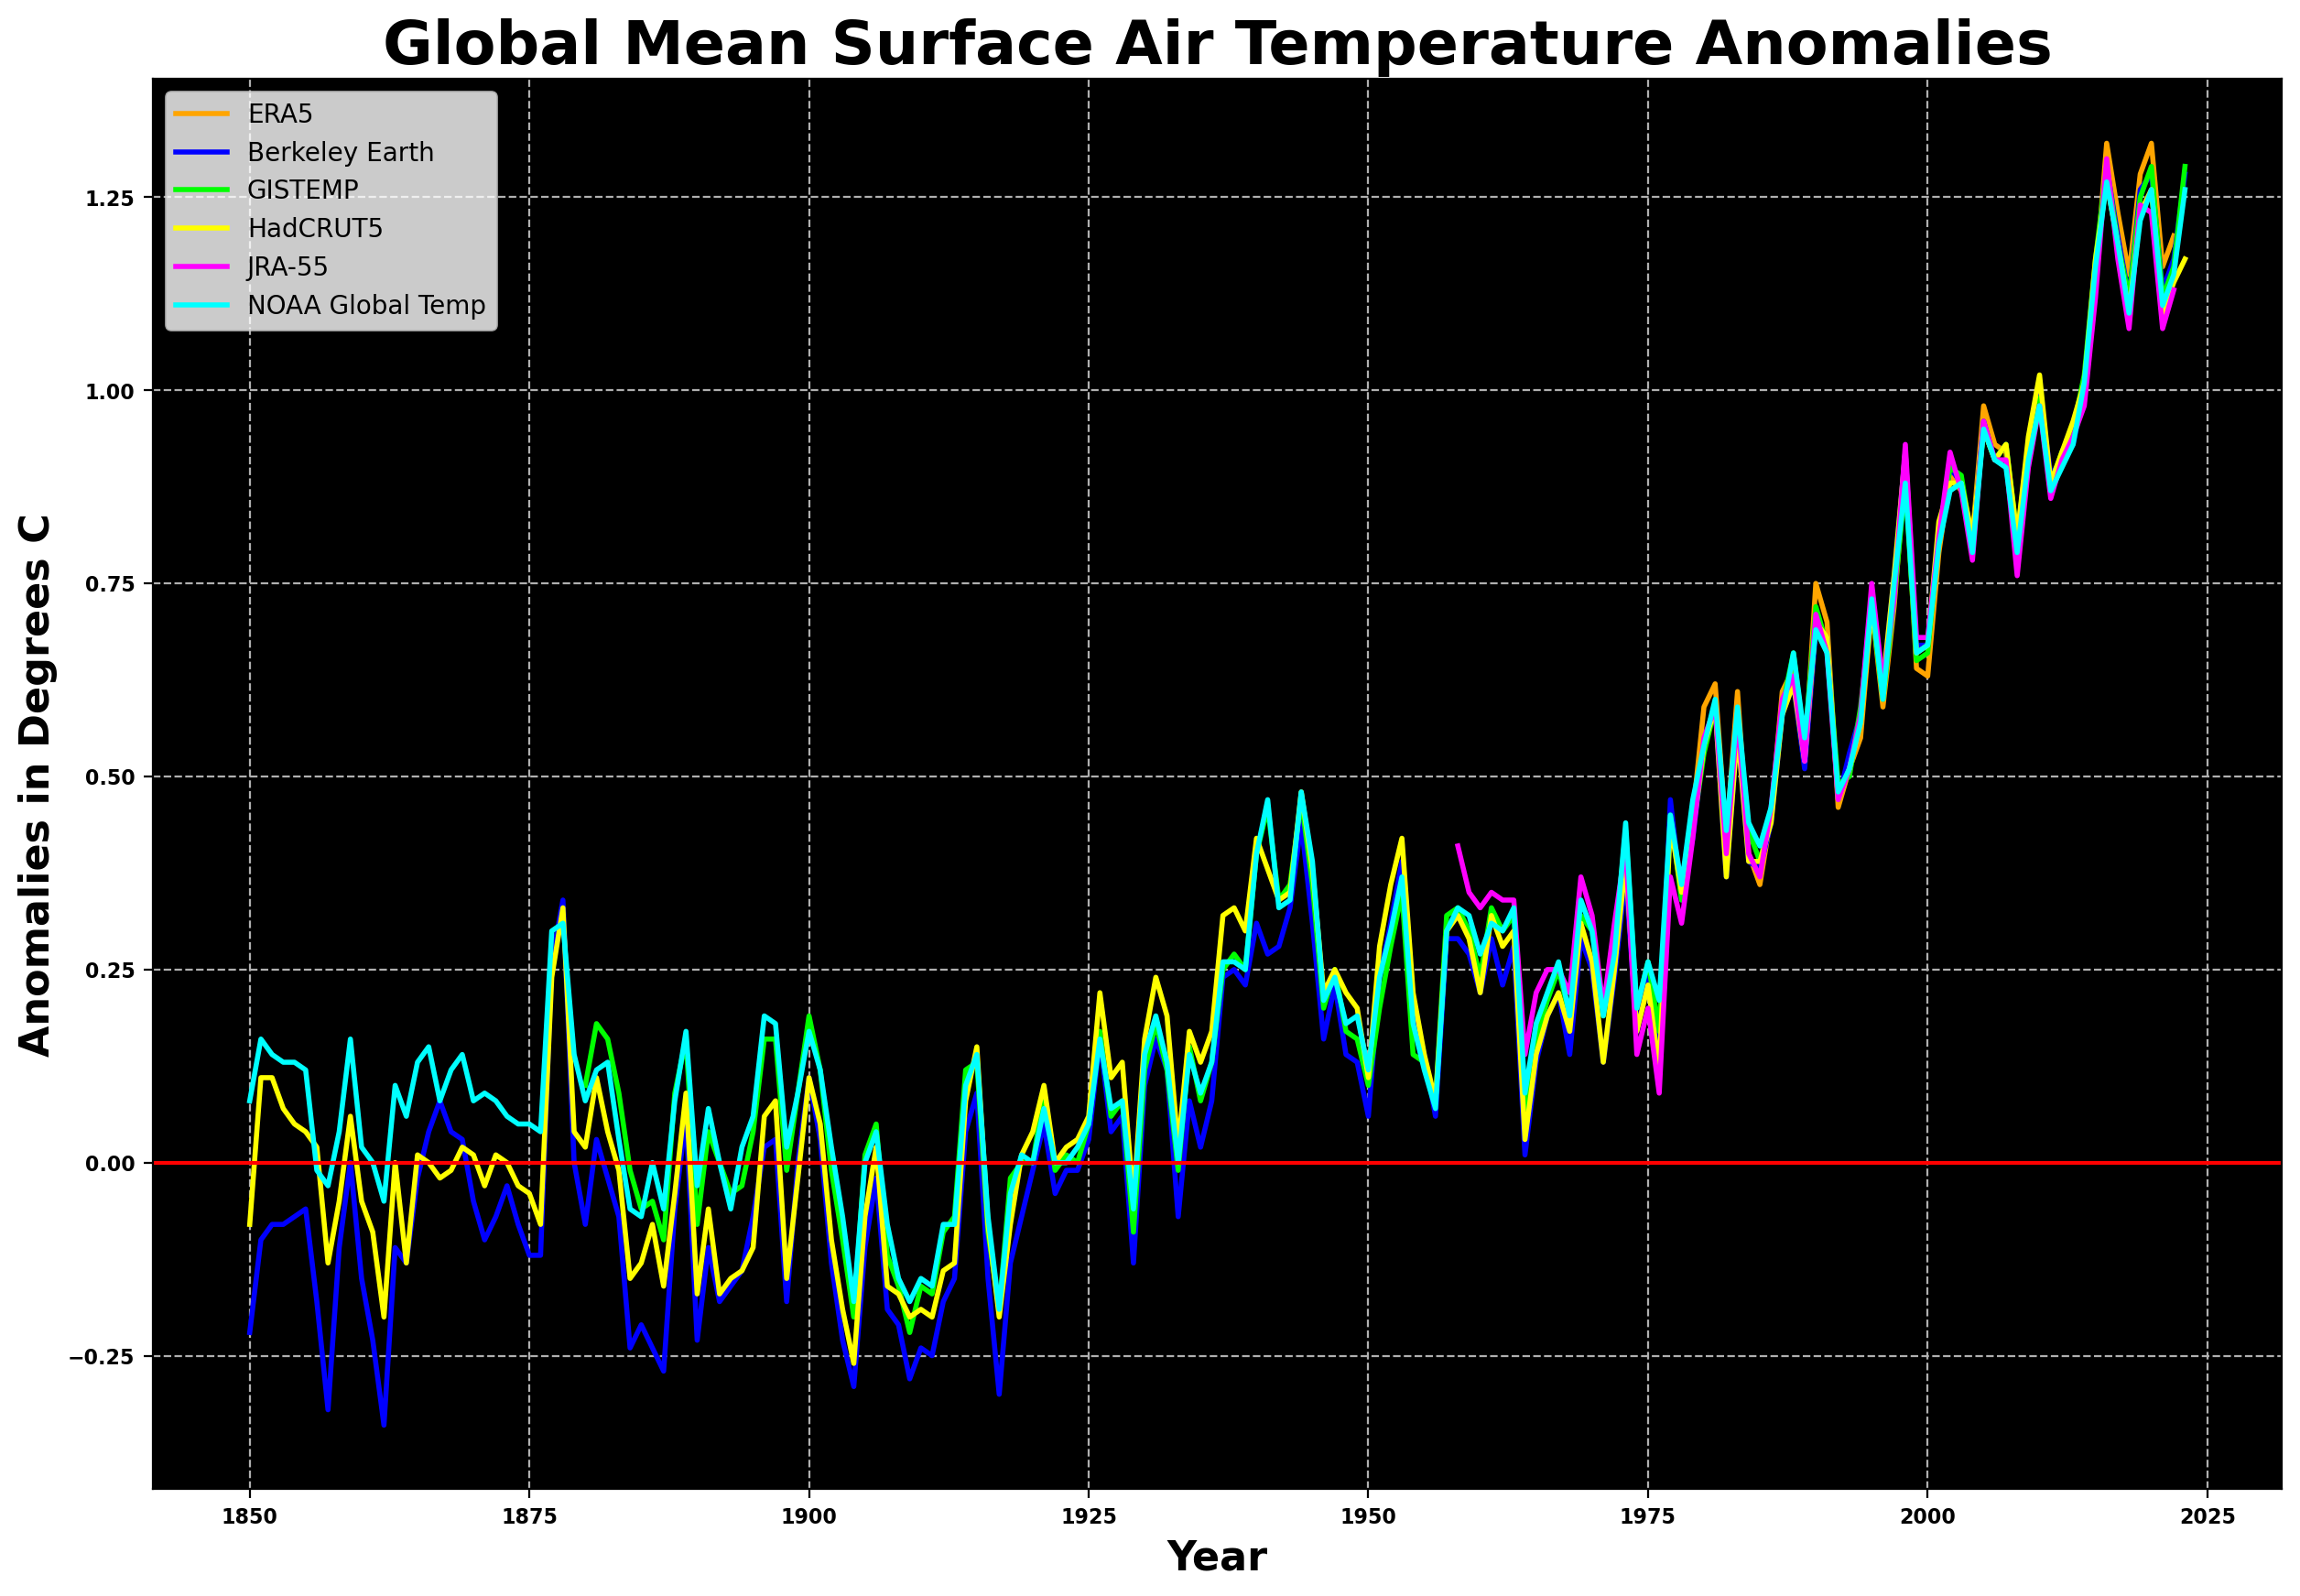

In [109]:
#creating a plot to Visualize the global mean surface air temperature anomalies
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(gmt_ERA5['Year'],
         gmt_ERA5['ERA5 (degC)'],
         linewidth=2,label='ERA5',
         color='orange')

ax.plot(gmt_Berkeley_Earth['Year'],
         gmt_Berkeley_Earth['Berkeley Earth (degC)'],
         linewidth=2,label='Berkeley Earth',
         color='blue')

ax.plot(gmt_GISTEMP['Year'],
         gmt_GISTEMP['GISTEMP (degC)'],
         linewidth=2,label='GISTEMP',
         color='lime')

ax.plot(gmt_HadCRUT5['Year'],
         gmt_HadCRUT5['HadCRUT5 (degC)'],
         linewidth=2,label='HadCRUT5',
         color='yellow')

ax.plot(gmt_JRA['Year'],
         gmt_JRA['JRA-55 (degC)'],
         linewidth=2,label='JRA-55',
         color='magenta')

ax.plot(gmt_NOAAGlobalTemp['Year'],
         gmt_NOAAGlobalTemp['NOAAGlobalTemp (degC)'],
         linewidth=2,label='NOAA Global Temp',
         color='aqua')


## Set properties of title, ylabels and xlabels
ax.set_title('Global Mean Surface Air Temperature Anomalies',
             fontsize=24, fontweight='bold')
ax.set_ylabel('Anomalies in Degrees C',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=16, fontweight='bold')

plt.legend() 
plt.grid(linestyle='--') ## Add dashed grid lines

### adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")

plt.axhline(y = 0, color = 'red', linestyle = '-') 

ax.set_facecolor("k")

**Figure 5.** Reanalysis products from ERA5, Berkeley Earth, GISTEMP, JRA-55, and NOAA Global Temp representing global mean surface air temperature anomalies from the baseline temperatures from the period between 1981-2010 depicted by the red horizontal line.

# <span style="color:red">15.</span> 

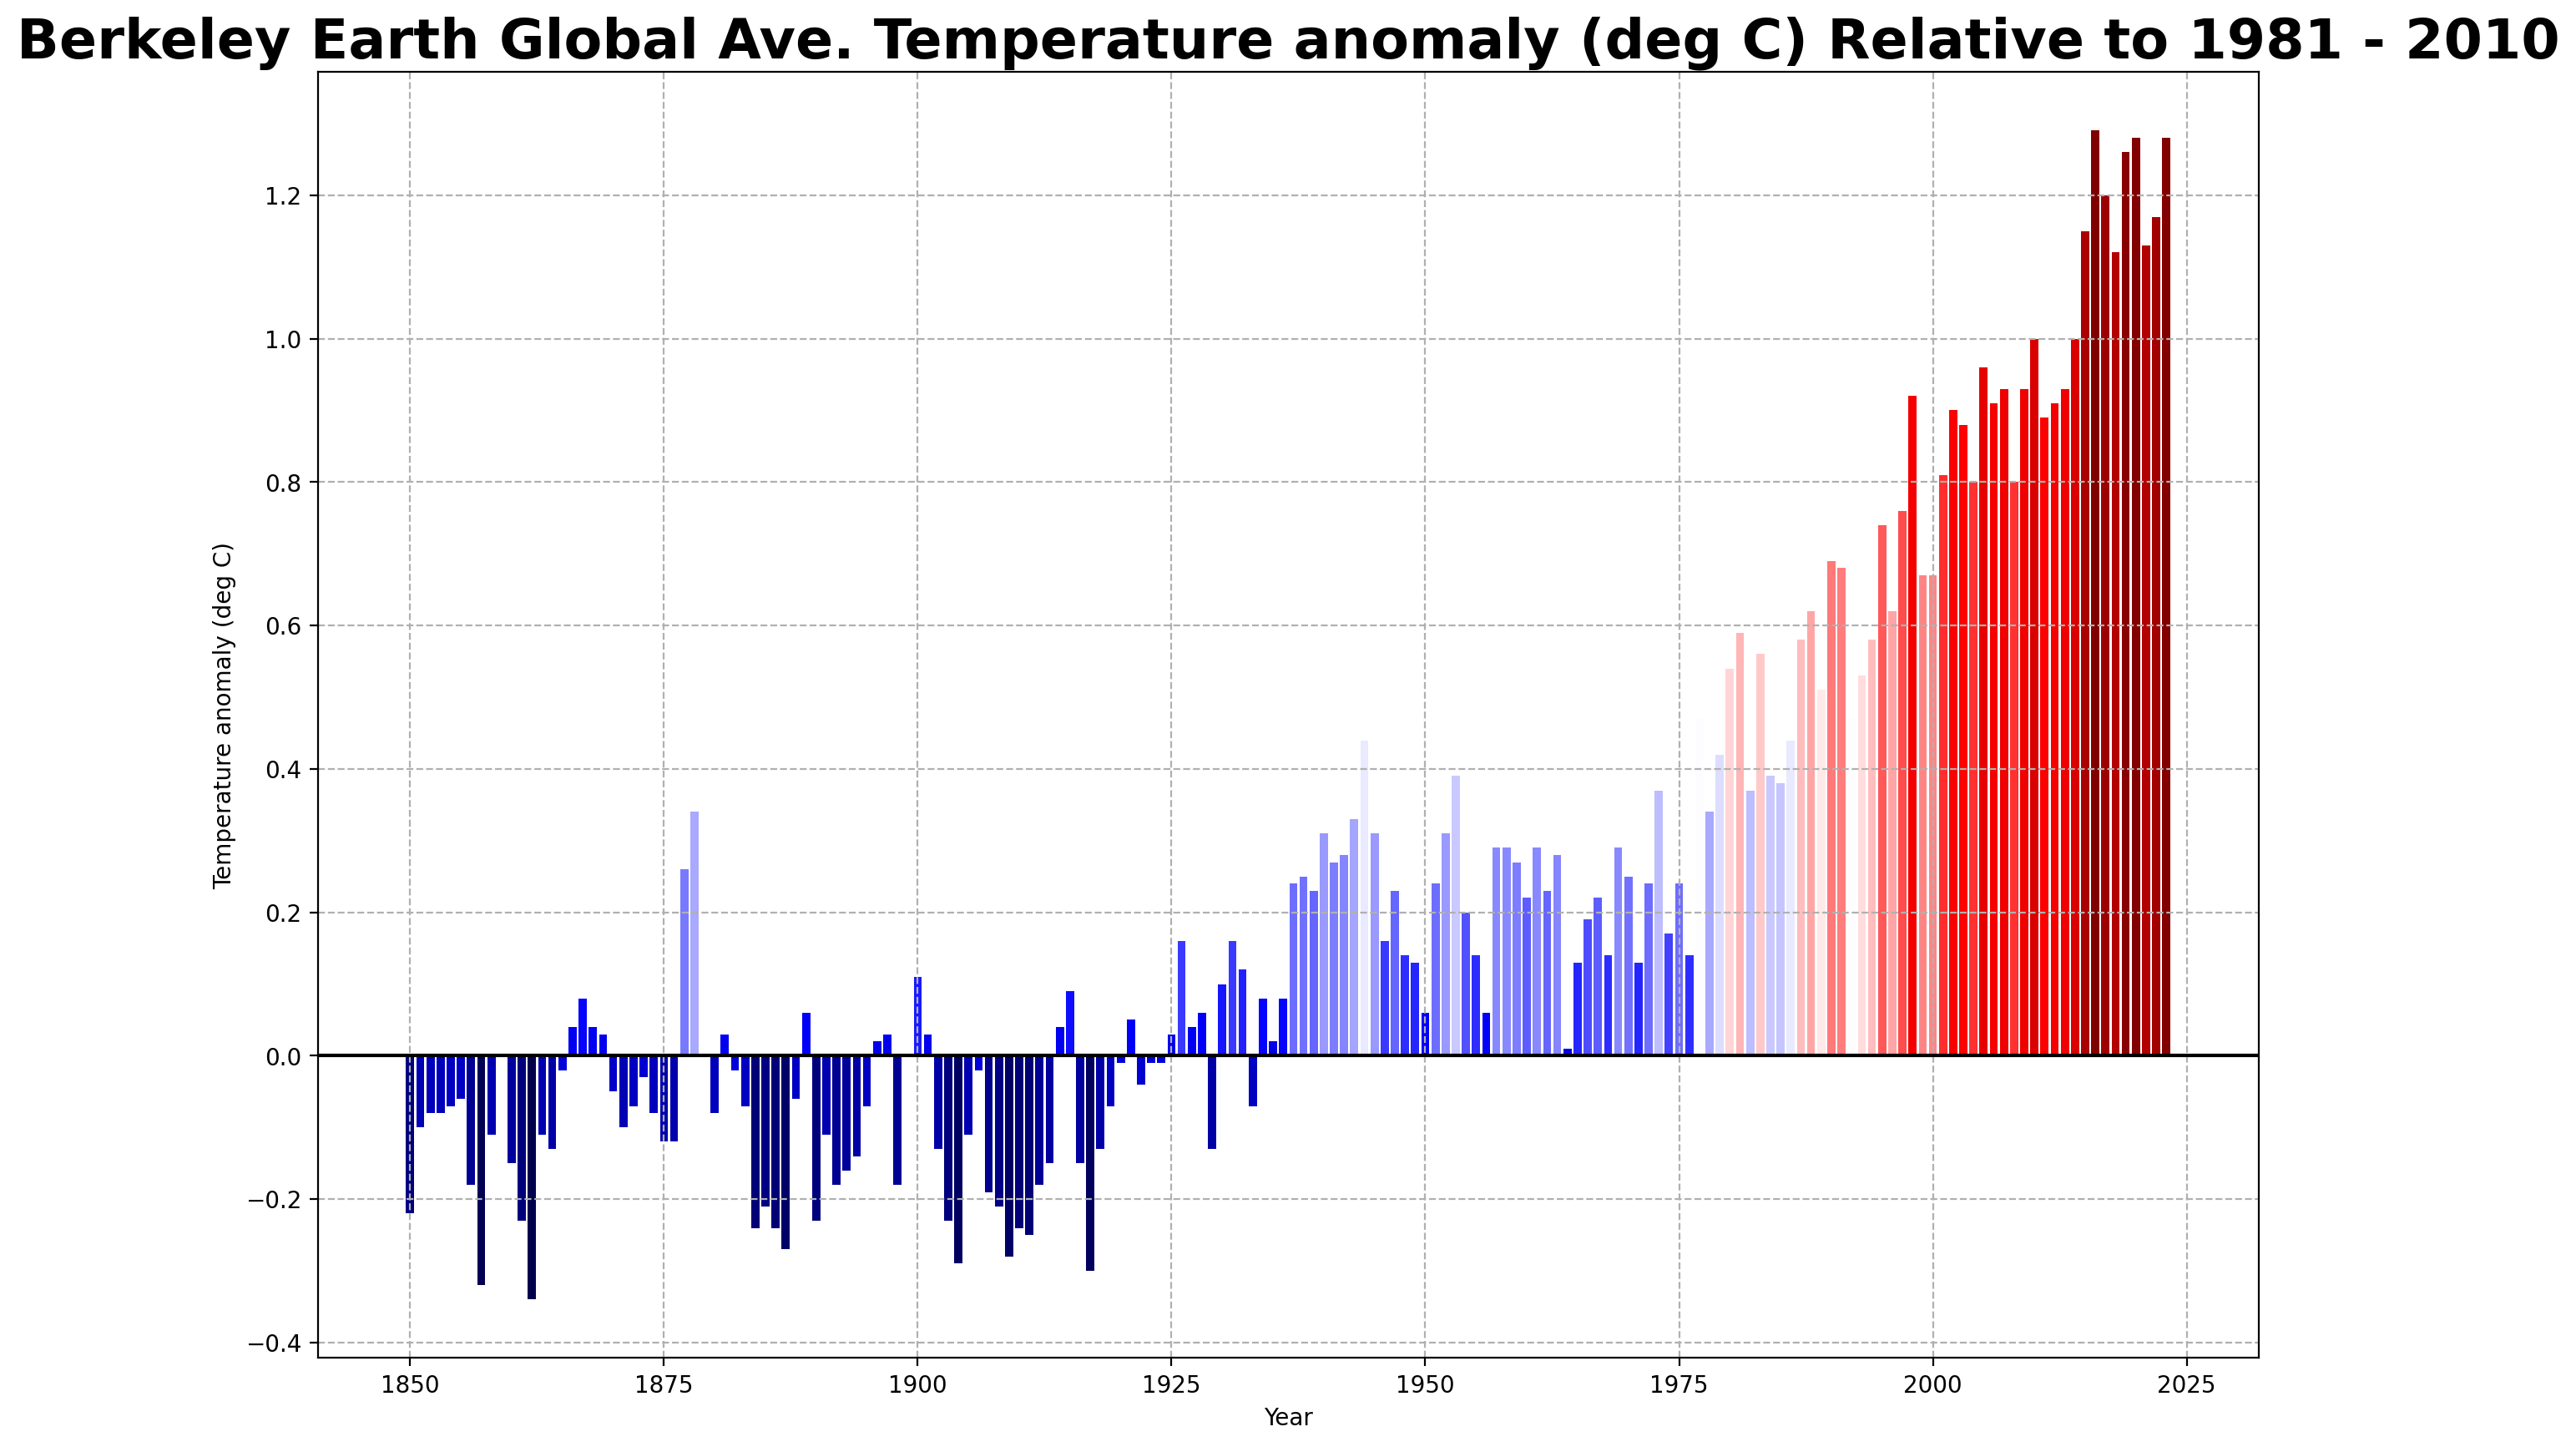

In [110]:
#making a bar plot of global mean surface air temperatures from Berkeley Earth
fig, ax = plt.subplots(figsize = (15, 10))

# Normalize data for colormap
Berkeyley_temp_values = gmt_Berkeley_Earth['Berkeley Earth (degC)']  ### Set the values to be used in our colormap
norm = plt.Normalize(min(Berkeyley_temp_values), 
                     max(Berkeyley_temp_values))

# Apply colormap 
cmap_seismic = colormap.get_cmap('seismic')
bar_colors = cmap_seismic(norm(Berkeyley_temp_values))

#bar chart
ax.bar(gmt_Berkeley_Earth['Year'],
        gmt_Berkeley_Earth['Berkeley Earth (degC)'],
        linewidth=2,label='Berkeley Earth global mean surface air temp anomaly',color=bar_colors)

## add a horizontal line at 0 
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Berkeley Earth Global Ave. Temperature anomaly (deg C) Relative to 1981 - 2010',fontsize=24, fontweight='bold')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

ax.grid(linestyle='--') ### add dashed grid lines

**Figure 6.** Global average surface air temperature anomalies from Berkeley Earth in degrees Celsius from the baseline period  1981-2010.

# <span style="color:red">16.</span> Temperature Anomalies Over Land vs Anomalies Over the Ocean
Is land heating up the same amount as the ocean? Let's take a look.

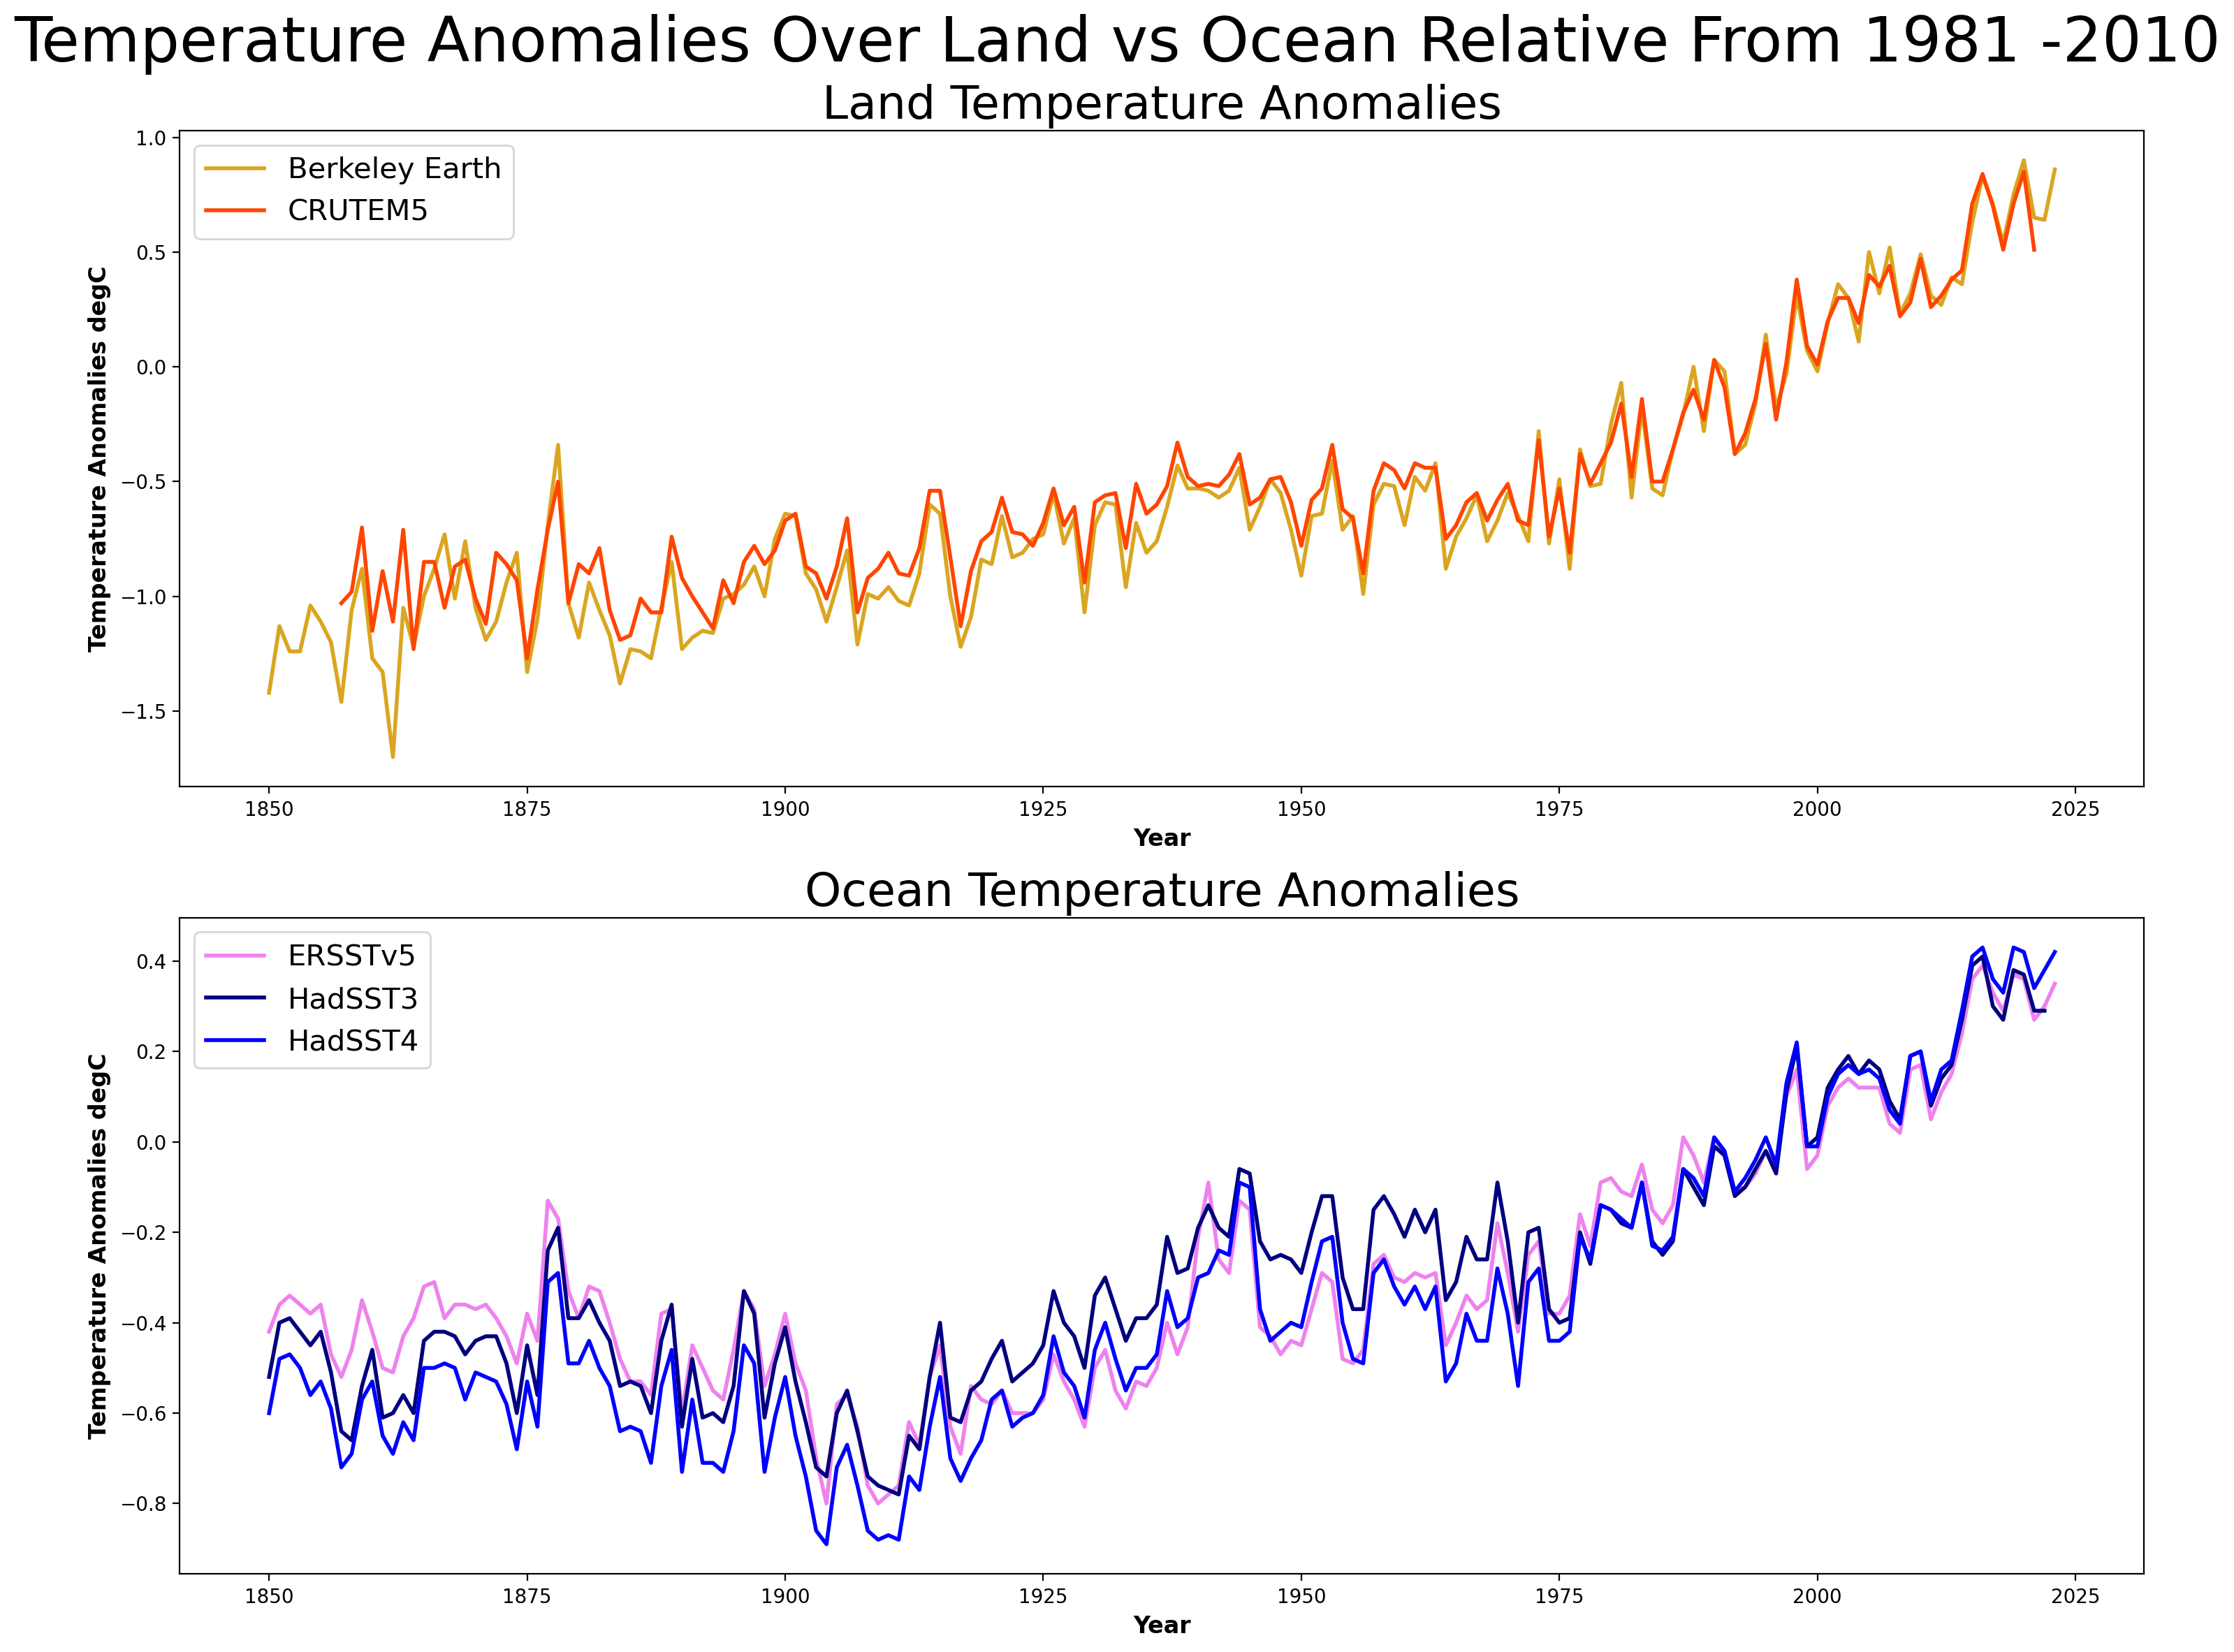

In [111]:
#creating a plot to compare the land and ocean anomalies
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
fig.suptitle('Temperature Anomalies Over Land vs Ocean Relative From 1981 -2010', fontsize=32)

#land anomalies
ax1.plot(lsat_Berkeley_Earth_Land['Year'],lsat_Berkeley_Earth_Land['Berkeley Earth Land (degC)'], linewidth=2,label='Berkeley Earth', color='goldenrod')
ax1.set_title('Land Temperature Anomalies', fontsize=24)
ax1.set_ylabel('Temperature Anomalies degC', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.legend(fontsize=15)

ax1.plot(lsat_CRUTEM5['Year'],lsat_CRUTEM5['CRUTEM5 (degC)'], linewidth=2,label='CRUTEM5', color='orangered')
ax1.set_ylabel('Temperature Anomalies degC', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.legend(fontsize=15)

              
#ocean anomalies
ax2.plot(sst_ERSSTv5['Year'],sst_ERSSTv5['ERSSTv5 (degC)'],linewidth=2,label='ERSSTv5',color='violet')
ax2.set_title('Ocean Temperature Anomalies', fontsize=24)
ax2.set_ylabel('Temperature Anomalies degC', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(fontsize=15)

ax2.plot(sst_HadSST3['Year'],sst_HadSST3['HadSST3 (degC)'],linewidth=2,label='HadSST3',color='navy')
ax2.set_ylabel('Temperature Anomalies degC', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(fontsize=15)

ax2.plot(sst_HadSST4['Year'],sst_HadSST4['HadSST4 (degC)'],linewidth=2,label='HadSST4',color='blue')
ax2.set_ylabel('Temperature Anomalies degC', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(fontsize=15)

plt.tight_layout()

**Figure 7.** Temperature anomalies over land vs over the ocean from reanalysis products Berkeley Earth, CRUTEM5, ERSSTv5, HadSST3, and HadSST4 calculated from the baseline period from 1981 - 2010 measured in degrees Celsius. 

# <span style="color:red">17.</span> How much has global average mean surface air temperatures risen relative to 1981-2021?

In [112]:
gmt_NOAAGlobalTemp

,Year,NOAAGlobalTemp (degC),NOAAGlobalTemp uncertainty
0,1850,0.08,0.152
1,1851,0.16,0.149
2,1852,0.14,0.148
3,1853,0.13,0.150
4,1854,0.13,0.150
...,...,...,...
169,2019,1.22,NaN
170,2020,1.26,NaN
171,2021,1.11,NaN
172,2022,1.15,NaN


In [89]:
#slicing the baseline period 1981-2010 using the .between method (found this method on stack overflow)
baseline=gmt_NOAAGlobalTemp[gmt_NOAAGlobalTemp['Year'].between(1981,2010)]
baseline

,Year,NOAAGlobalTemp (degC),NOAAGlobalTemp uncertainty
131,1981,0.60,0.072
132,1982,0.43,0.073
133,1983,0.59,0.072
134,1984,0.44,0.073
135,1985,0.41,0.076
136,1986,0.46,0.078
137,1987,0.58,NaN
138,1988,0.66,NaN
139,1989,0.55,NaN
140,1990,0.69,NaN


In [94]:
#calculating the mean values from this period 
mean_baseline=baseline['NOAAGlobalTemp (degC)'].mean()
mean_baseline

0.69

In [91]:
#slicing the present-day period 2011-2023 using the .between method (found this method on stack overflow)
present=gmt_NOAAGlobalTemp[gmt_NOAAGlobalTemp['Year'].between(2011,2023)]
present

,Year,NOAAGlobalTemp (degC),NOAAGlobalTemp uncertainty
161,2011,0.87,NaN
162,2012,0.90,NaN
163,2013,0.93,NaN
164,2014,1.01,NaN
165,2015,1.16,NaN
166,2016,1.27,NaN
167,2017,1.19,NaN
168,2018,1.10,NaN
169,2019,1.22,NaN
170,2020,1.26,NaN


In [95]:
#calculating the mean values from this period 
mean_present=present['NOAAGlobalTemp (degC)'].mean()
mean_present

1.1099999999999999

In [96]:
#calculating the difference of global mean temperatures
gmt_difference=mean_present-mean_baseline
gmt_difference

0.41999999999999993

In [98]:
#calculating the percent difference
percent_difference=((mean_present-mean_baseline)/mean_baseline)*100
percent_difference

60.8695652173913

### The global mean temperatures have risen about 0.42 degrees Celsius from the baseline. The percent difference indicates that global mean surface temperatures have risen 60% relative to the baseline period 1981-2010.

# <span style="color:red">18.</span> 
The land is heating up faster than the ocean for more than one reason. **Figure 7.** shows temperature anomalies between land and ocean. If you look at the axis, the land anomalies are greater than the ocean. Why is this? Water has a high specific heat which means it takes more energy for it to change temperature than land. We also have to remember that there is much more water than land which allows the ocean to store much more heat. The ocean also has depth and circulation patterns that allow it to transport heat to the deep. However, as the ocean grows warmer, circulation patterns are shifting in addition to its capacity to store carbon dioxide. 

Since land lacks a high specific heat capacity, depth, and vastness, it is warming much faster than the ocean. 

# Final Thoughts

After comparing pre-industrial GHG concentrations to present-day GHG concentrations and calculating the difference between global mean surface temperature anomalies from 1981-2010 and 2011-2023, it can be determined that GHG have drastically risen and are responsible for the warming we are experiencing. Temperature anomalies of the land and the ocean were also looked at separately and we saw that land is heating up faster than the ocean. The top GHG emitters were identified alongside the carbon emission types. China, the United States, and India are responsible for the highest GHG emissions. Data collected by the Global Carbon Project indicated that the burning of coal was responsible for emitting the most carbon between 1850 - 2021. The importance of reducing GHG emissions is becoming even more dire as more extreme weather events are occurring as a result of increased ocean temperatures. Property damage and death are on the rise as temperatures are. If the time for action wasn't 10 years ago, the time is surely now. 

